<a href="https://colab.research.google.com/github/leandro-adal/Eleicoes2018-AL/blob/main/Projeto_VS_Elei%C3%A7%C3%B5es_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Eleições Municipais 2020**

Fonte dos dados: [Dados abertos - TSE](https://dadosabertos.tse.jus.br/)

As tabelas podem ser baixadas nos links abaixo:
1.   https://dadosabertos.tse.jus.br/dataset/comparecimento-e-abstencao-2020 - Comparecimento e Abstenção na votação de 2020
2.   https://dadosabertos.tse.jus.br/dataset/candidatos-2020-subtemas - Informações sobre os candidatos que disputaram a eleição em 2020
2. https://dadosabertos.tse.jus.br/dataset/resultados-2020 - Dados sobre o resultado da votação

## Criando ambiente e importando bibliotecas

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Identificando o Perfil dos Cadidatos na Eleição Municipal de 2020 em Alagoas

## Tabelas

### Tabela 1 - Detalhes Candidatos

#### Descrição dos principais atributos

**Pricipais atributos do dataset**: 

*   NR_TURNO - Número do Turno
*   CD_ELEICAO - Código único da eleição
* NM_UE - Municipio que candidato concorre
*   DS_CARGO - Cargo ao qual o candidato concorre na eleição
*   NM_CANDIDATO - Nome completo do candidato
*   NM_SOCIAL_CANDIDATO - Nome social do candidato
*   DS_DETALHE_SITUACAO_CAND - Detalhe da situação do registro de candidatura do candidato que especifica o motivo pelo qual a candidatura foi julgada como 'Apta' ou 'Inapta'. 
*   SG_PARTIDO - Sigla do partido de origem do candidato
*   DT_NASCIMENTO - Data de nascimento do candidato
*   NR_IDADE_DATA_POSSE - dade do candidato na data da posse
* DS_GENERO - Gênero do candidato 
* DS_GRAU_INSTRUCAO - 
* DS_ESTADO_CIVIL - Estado civil do candidato 
* DS_COR_RACA - Cor/raça do candidato
* DS_OCUPACAO - Ocupação do candidato
* VR_DESPESA_MAX_CAMPANHA - Valor máximo, em reais, de despesas de campanha 
declarada pelo partido para aquele candidato
* DS_SIT_TOT_TURNO - Situação de totalização do candidato, naquele turno da 
eleição, após a totalização dos votos. 
 
* ST_REELEICAO - ndica se o candidato está concorrendo ou não à reeleição



Destaques: VR_DESPESA_MAX_CAMPANHA, DS_GENERO, DS_CARGO, NM_CANDIDATO, NR_IDADE_DATA_POSSE, DS_COR_RACA, DS_OCUPACAO


**Quantidade de linhas** = 7583

**Quantidade de Municipios** =  102

**Problemas encontrados**:  

#### Lendo a tabela

In [ ]:
#Tabela com dados sobre os candidatos
colunasT1 = ['NR_TURNO', 'CD_ELEICAO','NM_UE', 'DS_CARGO','NM_URNA_CANDIDATO', 'DS_SIT_TOT_TURNO', 'DS_GENERO', 'VR_DESPESA_MAX_CAMPANHA', 'NM_CANDIDATO',
             'SQ_CANDIDATO', 'DS_SITUACAO_CANDIDATO_URNA','DS_SITUACAO_CANDIDATURA','DS_DETALHE_SITUACAO_CAND','ST_CANDIDATO_INSERIDO_URNA', 'SG_PARTIDO',
             'DT_NASCIMENTO','NR_IDADE_DATA_POSSE', 'DS_GRAU_INSTRUCAO', 'DS_ESTADO_CIVIL', 'DS_COR_RACA', 'CD_OCUPACAO', 'DS_OCUPACAO', 'ST_REELEICAO',
             'NR_CANDIDATO']
dados_candidatos = pd.read_csv('/content/drive/My Drive/Visualização Computacional/consulta_cand_2020_AL.csv', sep=";", encoding='latin-1', usecols=colunasT1)

In [ ]:
# Filtrando com base no código do 1º turno da eleição ordinaria
dados_candidatos = dados_candidatos.loc[(dados_candidatos['CD_ELEICAO'] == 426) ]

adicionar cor a municipio e partido

juntas as tabelas

add espectro

#### Visualizando a Tabela

In [ ]:
dados_candidatos.head(10)

,NR_TURNO,CD_ELEICAO,NM_UE,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,DS_SITUACAO_CANDIDATURA,DS_DETALHE_SITUACAO_CAND,...,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,CD_OCUPACAO,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,DS_SIT_TOT_TURNO,ST_REELEICAO,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA
0,1,426,VIÇOSA,VEREADOR,20000673350,14555,ADEILTON ALEXANDRE FERREIRA,PAPAI FERREIRA,APTO,DEFERIDO,...,ENSINO FUNDAMENTAL COMPLETO,SOLTEIRO(A),PARDA,221,MOTOBOY,19368.44,NÃO ELEITO,N,DEFERIDO,SIM
1,1,426,SÃO MIGUEL DOS CAMPOS,VEREADOR,20000922834,25630,PETRÔNIO VERÇOSA LEMOS,PETRÔNIO VERÇOSA,APTO,DEFERIDO,...,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,257,EMPRESÁRIO,70399.54,ELEITO POR QP,N,DEFERIDO,SIM
2,1,426,ARAPIRACA,VEREADOR,20001257694,43456,MARIA JOSÉ LEITE DA SILVA,MARIA JOSÉ DA MANGABEIRA,APTO,DEFERIDO,...,ENSINO FUNDAMENTAL INCOMPLETO,SOLTEIRO(A),BRANCA,411,VENDEDOR DE COMÉRCIO VAREJISTA E ATACADISTA,94932.72,NÃO ELEITO,N,DEFERIDO,SIM
3,1,426,PIAÇABUÇU,PREFEITO,20000797456,12,KAYRO CRISTÓVÃO CASTRO DOS SANTOS,KAYRO CASTRO,APTO,DEFERIDO,...,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,601,AGRICULTOR,123077.42,NÃO ELEITO,N,DEFERIDO,SIM
4,1,426,SÃO SEBASTIÃO,VEREADOR,20000698660,11456,FHYSLAUREN FIRMINO ALBUQUERQUE,FHYSLAUREN ALBUQUERQUE,APTO,DEFERIDO,...,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PARDA,931,"ESTUDANTE, BOLSISTA, ESTAGIÁRIO E ASSEMELHADOS",34383.77,SUPLENTE,N,DEFERIDO,SIM
5,1,426,SÃO SEBASTIÃO,VEREADOR,20000698699,77555,HENRIQUE GARCEZ DE OLIVEIRA,HENRIQUE GARCEZ,APTO,DEFERIDO,...,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),PARDA,257,EMPRESÁRIO,34383.77,SUPLENTE,N,DEFERIDO,SIM
6,1,426,PORTO REAL DO COLÉGIO,VEREADOR,20001120697,10900,CRISLANE DE CASTRO DONATO FONSECA,CRIS DE TETEIA,APTO,DEFERIDO,...,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),BRANCA,999,OUTROS,15842.79,SUPLENTE,N,DEFERIDO,SIM
7,1,426,BRANQUINHA,VEREADOR,20000973119,43000,ROBSON LOPES DE SOUZA,ROBINHO DO BAR,APTO,DEFERIDO,...,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PARDA,278,VEREADOR,12307.75,ELEITO POR QP,N,DEFERIDO,SIM
8,1,426,CAMPO ALEGRE,VEREADOR,20000759145,14456,EDINALDO DOS SANTOS CANDIDO,IRMAO EDINALDO,APTO,DEFERIDO,...,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PARDA,169,COMERCIANTE,24211.47,SUPLENTE,N,DEFERIDO,SIM
9,1,426,SÃO BRÁS,VEREADOR,20000744324,14444,WILLIAM DOUGLAS BEZERRA DA ROCHA,DOUGLAS DO GIRAU,APTO,DEFERIDO,...,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PARDA,931,"ESTUDANTE, BOLSISTA, ESTAGIÁRIO E ASSEMELHADOS",19751.25,ELEITO POR QP,N,DEFERIDO,SIM


In [ ]:
dados_candidatos.sample(10)

,NR_TURNO,CD_ELEICAO,NM_UE,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,DS_SITUACAO_CANDIDATURA,DS_DETALHE_SITUACAO_CAND,...,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,CD_OCUPACAO,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,DS_SIT_TOT_TURNO,ST_REELEICAO,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA
6479,1,426,IGREJA NOVA,VEREADOR,20001244298,10000,DALMO JOSE LINO,DALMO LINO,APTO,DEFERIDO,...,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,254,VIGILANTE,33660.79,SUPLENTE,S,DEFERIDO,SIM
1408,1,426,PORTO CALVO,VEREADOR,20001113864,23333,CLEVISSON WASHINGTON SILVA DE ARAÚJO,KEKO CHURROS,APTO,DEFERIDO,...,ENSINO FUNDAMENTAL INCOMPLETO,SOLTEIRO(A),PARDA,999,OUTROS,15929.49,NÃO ELEITO,N,DEFERIDO,SIM
6103,1,426,CRAÍBAS,VEREADOR,20000981005,11456,IVAN JOSE DA SILVA,SARGENTO IVAN,APTO,DEFERIDO,...,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,278,VEREADOR,24937.22,SUPLENTE,S,DEFERIDO COM RECURSO,SIM
7372,1,426,MACEIÓ,VEREADOR,20000823807,55120,DJANETE BARBOSA SILVA,DJANETE,APTO,DEFERIDO,...,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,581,DONA DE CASA,251112.20,SUPLENTE,N,DEFERIDO,SIM
4387,1,426,CORURIPE,VEREADOR,20000702668,11777,RILSON FERREIRA DOS SANTOS,RILSON FERREIRA,APTO,DEFERIDO,...,ENSINO MÉDIO COMPLETO,DIVORCIADO(A),BRANCA,531,MOTORISTA DE VEÍCULOS DE TRANSPORTE COLETIVO D...,28804.27,SUPLENTE,N,DEFERIDO,SIM
5524,1,426,IGREJA NOVA,VEREADOR,20001032921,11678,MARIA FERREIRA DA SILVA,NENONA,APTO,DEFERIDO,...,ENSINO FUNDAMENTAL COMPLETO,SOLTEIRO(A),PARDA,197,GARI OU LIXEIRO,33660.79,SUPLENTE,N,DEFERIDO,SIM
705,1,426,SÃO MIGUEL DOS MILAGRES,VEREADOR,20000997443,15333,SUELI MARIA DOS SANTOS OLIVEIRA,SUELI OLIVEIRA,APTO,DEFERIDO,...,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,999,OUTROS,26960.89,SUPLENTE,N,DEFERIDO,SIM
60,1,426,SÃO LUÍS DO QUITUNDE,VEREADOR,20000730753,10100,EDVALDO ANTONIO DO NASCIMENTO,EDVALDO DA TANIA CABELEIREIRA,APTO,DEFERIDO,...,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,531,MOTORISTA DE VEÍCULOS DE TRANSPORTE COLETIVO D...,18470.72,SUPLENTE,N,DEFERIDO,SIM
362,1,426,PINDOBA,VEREADOR,20001099597,40333,MARIA SUELI DA SILVA,LIU,APTO,DEFERIDO,...,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),BRANCA,298,SERVIDOR PÚBLICO MUNICIPAL,20494.63,ELEITO POR MÉDIA,N,DEFERIDO,SIM
6410,1,426,JEQUIÁ DA PRAIA,VEREADOR,20000679715,11222,JOSE PETRUCIO ALEXANDRE DOS SANTOS,ALEXANDRE,APTO,DEFERIDO,...,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),BRANCA,604,PESCADOR,35723.50,SUPLENTE,N,DEFERIDO,SIM


#### Manipulando os dados

##### Verificar valores Ausentes

In [ ]:
#Valores não-nulos por coluna
dados_candidatos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7573 entries, 0 to 7582
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   NR_TURNO                    7573 non-null   int64  
 1   CD_ELEICAO                  7573 non-null   int64  
 2   NM_UE                       7573 non-null   object 
 3   DS_CARGO                    7573 non-null   object 
 4   SQ_CANDIDATO                7573 non-null   int64  
 5   NR_CANDIDATO                7573 non-null   int64  
 6   NM_CANDIDATO                7573 non-null   object 
 7   NM_URNA_CANDIDATO           7573 non-null   object 
 8   DS_SITUACAO_CANDIDATURA     7573 non-null   object 
 9   DS_DETALHE_SITUACAO_CAND    7573 non-null   object 
 10  SG_PARTIDO                  7573 non-null   object 
 11  DT_NASCIMENTO               7572 non-null   object 
 12  NR_IDADE_DATA_POSSE         7572 non-null   float64
 13  DS_GENERO                   7573 

In [ ]:
#Número de valores ausentes para cada coluna
dados_candidatos.isnull().sum()

NR_TURNO                      0
CD_ELEICAO                    0
NM_UE                         0
DS_CARGO                      0
SQ_CANDIDATO                  0
NR_CANDIDATO                  0
NM_CANDIDATO                  0
NM_URNA_CANDIDATO             0
DS_SITUACAO_CANDIDATURA       0
DS_DETALHE_SITUACAO_CAND      0
SG_PARTIDO                    0
DT_NASCIMENTO                 1
NR_IDADE_DATA_POSSE           1
DS_GENERO                     0
DS_GRAU_INSTRUCAO             0
DS_ESTADO_CIVIL               0
DS_COR_RACA                   0
CD_OCUPACAO                   0
DS_OCUPACAO                   0
VR_DESPESA_MAX_CAMPANHA       0
DS_SIT_TOT_TURNO              0
ST_REELEICAO                  0
DS_SITUACAO_CANDIDATO_URNA    0
ST_CANDIDATO_INSERIDO_URNA    0
dtype: int64

**Conclusão**: não há valores faltantes nessa tabela

##### Procurando inconsistèncias nos dados

In [ ]:
# verificando os valores únicos na tabela e se realmente so existe o 1º turno após o filtro
dados_candidatos.nunique()

NR_TURNO                         1
CD_ELEICAO                       1
NM_UE                          102
DS_CARGO                         3
SQ_CANDIDATO                  7573
NR_CANDIDATO                  1432
NM_CANDIDATO                  7471
NM_URNA_CANDIDATO             7293
DS_SITUACAO_CANDIDATURA          2
DS_DETALHE_SITUACAO_CAND         9
SG_PARTIDO                      30
DT_NASCIMENTO                 5977
NR_IDADE_DATA_POSSE             64
DS_GENERO                        3
DS_GRAU_INSTRUCAO                9
DS_ESTADO_CIVIL                  6
DS_COR_RACA                      7
CD_OCUPACAO                    154
DS_OCUPACAO                    154
VR_DESPESA_MAX_CAMPANHA        124
DS_SIT_TOT_TURNO                 7
ST_REELEICAO                     3
DS_SITUACAO_CANDIDATO_URNA       6
ST_CANDIDATO_INSERIDO_URNA       2
dtype: int64

In [ ]:
dados_candidatos.shape # Vendo a quantidade de linhas e colunas na tabela

(7573, 24)

In [ ]:
# O código e nr do turno não serão nescessarios
dados_candidatos.drop(columns=['CD_ELEICAO', 'NR_TURNO', 'DS_SITUACAO_CANDIDATURA'], inplace=True)

In [ ]:
dados_candidatos.columns.values # Vendo se realmente as colunas sumiram

array(['NM_UE', 'DS_CARGO', 'SQ_CANDIDATO', 'NR_CANDIDATO',
       'NM_CANDIDATO', 'NM_URNA_CANDIDATO', 'DS_DETALHE_SITUACAO_CAND',
       'SG_PARTIDO', 'DT_NASCIMENTO', 'NR_IDADE_DATA_POSSE', 'DS_GENERO',
       'DS_GRAU_INSTRUCAO', 'DS_ESTADO_CIVIL', 'DS_COR_RACA',
       'CD_OCUPACAO', 'DS_OCUPACAO', 'VR_DESPESA_MAX_CAMPANHA',
       'DS_SIT_TOT_TURNO', 'ST_REELEICAO', 'DS_SITUACAO_CANDIDATO_URNA',
       'ST_CANDIDATO_INSERIDO_URNA'], dtype=object)

In [ ]:
dados_candidatos['DS_CARGO'].unique() # Verificando os cargos presentes na tabela 

array(['VEREADOR', 'PREFEITO', 'VICE-PREFEITO'], dtype=object)

* Criado filtro com os vice-prefeitos tirados da tabela

In [ ]:
dados_candidatos['DS_CARGO'].value_counts() # Observando o número de candidatos para cada cargo

VEREADOR         6887
VICE-PREFEITO     348
PREFEITO          338
Name: DS_CARGO, dtype: int64

In [ ]:
dados_candidatos['NM_CANDIDATO'].value_counts() # Verificando se há candidatos com nomes iguais

MARIA JOSÉ DA SILVA                        4
MARIA APARECIDA DOS SANTOS                 4
JOSÉ CARLOS DOS SANTOS                     4
JOSE CICERO DA SILVA                       4
JOSÉ ROBERTO DOS SANTOS                    4
                                          ..
ADRIANA ALVES BEZERRA                      1
MARIA CRISTINA FERREIRA DE MENDONÇA        1
MARIA FELIX SILVA DOS SANTOS               1
WADEILDO JOSE GOMES VASCONCELOS BEZERRA    1
SIDNEY CONDE PLACIDO                       1
Name: NM_CANDIDATO, Length: 7471, dtype: int64

In [ ]:
# Como em teoria não pode haver dois candidatos com mesmo número para o cargo e cidade iguais
dados_candidatos[['NM_UE','NR_CANDIDATO', 'DS_CARGO']].value_counts() # OBS: Vice-prefeito possui o mesmo nº que o prefeito

NM_UE              NR_CANDIDATO  DS_CARGO     
PORTO CALVO        55            PREFEITO         3
PARICONHA          15            VICE-PREFEITO    2
SÃO BRÁS           20            VICE-PREFEITO    2
PARICONHA          15            PREFEITO         2
SANTANA DO MUNDAÚ  33111         VEREADOR         2
                                                 ..
JEQUIÁ DA PRAIA    45            PREFEITO         1
                   40            VICE-PREFEITO    1
                                 PREFEITO         1
                   11            PREFEITO         1
ÁGUA BRANCA        90999         VEREADOR         1
Length: 7530, dtype: int64

In [ ]:
dados_candidatos[['NR_CANDIDATO', 'NM_UE', 'NM_CANDIDATO']].value_counts()

NR_CANDIDATO  NM_UE                 NM_CANDIDATO                   
20            ATALAIA               CAMYLA BRASIL PARANHOS LIMA        2
15            ÁGUA BRANCA           MARCELO SANDES GOMES               2
28555         MATRIZ DE CAMARAGIBE  EDLEIDE SANTOS DA SILVA            2
15            PARICONHA             ALVONI FEITOSA DA SILVA            2
10            ARAPIRACA             EVERTON SANTIAGO MAIA              1
                                                                      ..
13999         SANTANA DO IPANEMA    WYLLYANNE STEFFANNE LIMA FARIAS    1
              PALMEIRA DOS ÍNDIOS   JEFFERSON PONTES DOS SANTOS        1
              MINADOR DO NEGRÃO     IARA SOARES DE OLIVEIRA            1
              MARECHAL DEODORO      JOSE JORGE DOS SANTOS              1
90999         ÁGUA BRANCA           ADENILSON DE ARAÚJO DE SOUZA       1
Length: 7569, dtype: int64

In [ ]:
dados_candidatos['SG_PARTIDO'].unique() # Verificando os partidos presentes na tabela

array(['PTB', 'DEM', 'PV', 'PDT', 'PP', 'SOLIDARIEDADE', 'REPUBLICANOS',
       'MDB', 'PT', 'PSD', 'AVANTE', 'PSDB', 'PRTB', 'PMN', 'PSB', 'PTC',
       'PATRIOTA', 'PSC', 'PODE', 'PSL', 'PROS', 'CIDADANIA', 'PC do B',
       'PL', 'PSOL', 'REDE', 'DC', 'UP', 'PSTU', 'PCB'], dtype=object)

In [ ]:
dados_candidatos['DS_GRAU_INSTRUCAO'].unique() # Verificando a escolaridade dos candidatos presentes na tabela

array(['ENSINO FUNDAMENTAL COMPLETO', 'ENSINO MÉDIO COMPLETO',
       'ENSINO FUNDAMENTAL INCOMPLETO', 'SUPERIOR INCOMPLETO',
       'LÊ E ESCREVE', 'SUPERIOR COMPLETO', 'ENSINO MÉDIO INCOMPLETO',
       'NÃO DIVULGÁVEL', 'ANALFABETO'], dtype=object)

In [ ]:
dados_candidatos['DS_ESTADO_CIVIL'].unique() # Verificando os estados cívis presentes na tabela

array(['SOLTEIRO(A)', 'CASADO(A)', 'VIÚVO(A)', 'DIVORCIADO(A)',
       'SEPARADO(A) JUDICIALMENTE', 'NÃO DIVULGÁVEL'], dtype=object)

In [ ]:
dados_candidatos['DS_COR_RACA'].unique() # Verificando as cor/raca presentes na tabela

array(['PARDA', 'BRANCA', 'PRETA', 'NÃO INFORMADO', 'AMARELA', 'INDÍGENA',
       'NÃO DIVULGÁVEL'], dtype=object)

In [ ]:
dados_candidatos['DS_OCUPACAO'].unique() # Verificando as ocupações presentes na tabela

array(['MOTOBOY', 'EMPRESÁRIO',
       'VENDEDOR DE COMÉRCIO VAREJISTA E ATACADISTA', 'AGRICULTOR',
       'ESTUDANTE, BOLSISTA, ESTAGIÁRIO E ASSEMELHADOS', 'OUTROS',
       'VEREADOR', 'COMERCIANTE', 'APOSENTADO (EXCETO SERVIDOR PÚBLICO)',
       'AGENTE ADMINISTRATIVO', 'DONA DE CASA',
       'VENDEDOR PRACISTA, REPRESENTANTE, CAIXEIRO-VIAJANTE E ASSEMELHADOS',
       'TÉCNICO EM AGRONOMIA E AGRIMENSURA', 'ADMINISTRADOR',
       'ASSISTENTE SOCIAL', 'REPRESENTANTE COMERCIAL', 'ADVOGADO',
       'JORNALISTA E REDATOR', 'TRABALHADOR RURAL', 'VIGILANTE',
       'SERVIDOR PÚBLICO FEDERAL', 'SERVIDOR PÚBLICO MUNICIPAL',
       'DECORADOR',
       'MOTORISTA DE VEÍCULOS DE TRANSPORTE COLETIVO DE PASSAGEIROS',
       'PROFESSOR DE ENSINO FUNDAMENTAL', 'PRODUTOR AGROPECUÁRIO',
       'PEDAGOGO', 'POLICIAL MILITAR', 'CONTADOR', 'MOTORISTA PARTICULAR',
       'ENGENHEIRO', 'ZOOTECNISTA', 'SERVIDOR PÚBLICO ESTADUAL',
       'FISIOTERAPEUTA E TERAPEUTA OCUPACIONAL',
       'AGENTE DE SAÚDE E SAN

In [ ]:
dados_candidatos['DS_OCUPACAO'].value_counts() 

OUTROS                                                  1285
AGRICULTOR                                              1013
SERVIDOR PÚBLICO MUNICIPAL                               626
VEREADOR                                                 526
COMERCIANTE                                              490
                                                        ... 
MODELO                                                     1
LEITURISTA                                                 1
PETROLEIRO                                                 1
EMBALADOR, EMPACOTADOR E ASSEMELHADOS                      1
MARINHEIRO CIVIL, CANOEIRO, EMBARCADO E ASSEMELHADOS       1
Name: DS_OCUPACAO, Length: 154, dtype: int64

In [ ]:
dados_candidatos['DS_SIT_TOT_TURNO'].unique() # Verificando o status dos candidatos ao fim do 1º turno presentes na tabela

array(['NÃO ELEITO', 'ELEITO POR QP', 'SUPLENTE', '#NULO#', 'ELEITO',
       'ELEITO POR MÉDIA', '2º TURNO'], dtype=object)

##### Verficar o número total de municipios presentes

In [ ]:
#Calculando o número de municipios e o numero de candidatos por municipio
dados_candidatos[['NM_UE']].value_counts()

NM_UE                
MACEIÓ                   619
ARAPIRACA                376
UNIÃO DOS PALMARES       261
MARECHAL DEODORO         186
SÃO MIGUEL DOS CAMPOS    165
                        ... 
SENADOR RUI PALMEIRA      27
QUEBRANGULO               27
BELO MONTE                24
PINDOBA                   23
CACIMBINHAS               21
Length: 102, dtype: int64

Conclusão: 
* Há 102 municipios quantificados, ou seja, todos os municipios do estado.



#### Outros filtros

In [ ]:
# filtrando por vereador e prefeito
filtro_no_vice = dados_candidatos.loc[dados_candidatos['DS_CARGO'] != 'VICE-PREFEITO']

In [ ]:
filtro_no_vice.shape

(7225, 21)

In [ ]:
# Filtro para pegar dados de um municipo
municipio = 'ARAPIRACA'
mun_dados_cand = dados_candidatos.loc[(dados_candidatos['NM_UE'] == municipio)]

### Tabela 2 - Votos recebidos por cada cadidato - 1º turno

#### Atributos da tabela

Pricipais atributos do dataset: 

* str - **CD_ELEICAO** - código da eleição
* str - **DS_CARGO** = Prefeito ou Vereador
* str - **SG_UE** - número do municipio
* int - **SQ_CANDIDATO** - número sequencial gerado pelos sistemas eleitorais
* str - **NM_UE** - nome da unidade eleitoral do candidato
* str -  **NM_CANDIDATO** - nome do cadidato
* int -   **nr_turno** = o turno em que foram resgistrados os dados
* int -  **nr_zona** - número da zona eleitoral
* str  **sg_partido** = sigla do partido do cadidato
* int - **CD_SIT_TOT_TURNO** - código da situação de totalização no turno
* str -  **ds_sit_totalizacao** = eleito, nao eleito e +
* str - **NM_URNA_CANDIDATO** - nome do candidato na urna
* int -  **QT_VOTOS_NOMINAIS** = Quantidade de votos dedicados a cada candidato por Zona Eleitoral


**Quantidade de linhas**: 9337 para o estado de Alagoas

**Quantidade de Municipios**: 102, ou seja, todos os municípios do Estado

Não foram encontrados valores ausentes na tabela

#### Lendo a Tabela

In [ ]:
#Tabela que contem a quantidade de votos que cada canditado recebeu por zona na eleição de 2020
#OBS: algumas cidades tem mais de uma zona eleitoral
dados_votacao_zona = pd.read_csv('/content/drive/My Drive/Visualização Computacional/votacao_candidato_munzona_2020_AL.csv', sep=";", encoding='latin-1')

In [ ]:
# Pegando o 1º turno das eleições ordinarias
dados_votacao = dados_votacao_zona.loc[(dados_votacao_zona.CD_ELEICAO == 426)]

Como algumas cidades como Maceio e Arapiraca possuem mais de uma zona eleitoral é nescessario tratar os dados

#### Visualizando a Tabela

In [ ]:
dados_votacao.head(10)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_VOTO_EM_TRANSITO,QT_VOTOS_NOMINAIS
0,12/09/2022,03:56:30,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,15,MDB,Movimento Democrático Brasileiro,20000075552,PARTIDO ISOLADO,MDB,2,ELEITO POR QP,N,590
1,12/09/2022,03:56:30,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,15,MDB,Movimento Democrático Brasileiro,20000075552,PARTIDO ISOLADO,MDB,3,ELEITO POR MÉDIA,N,544
2,12/09/2022,03:56:30,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,15,MDB,Movimento Democrático Brasileiro,20000075552,PARTIDO ISOLADO,MDB,5,SUPLENTE,N,468
3,12/09/2022,03:56:30,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,70,AVANTE,AVANTE,20000075658,PARTIDO ISOLADO,AVANTE,4,NÃO ELEITO,N,645
4,12/09/2022,03:56:30,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,70,AVANTE,AVANTE,20000075702,PARTIDO ISOLADO,AVANTE,4,NÃO ELEITO,N,9
5,12/09/2022,03:56:30,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,11,PP,PROGRESSISTAS,20000088522,PARTIDO ISOLADO,PP,5,SUPLENTE,N,0
6,12/09/2022,03:56:30,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,25,DEM,Democratas,20000106784,PARTIDO ISOLADO,DEM,5,SUPLENTE,N,1
7,12/09/2022,03:56:30,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,40,PSB,Partido Socialista Brasileiro,20000106791,PARTIDO ISOLADO,PSB,4,NÃO ELEITO,N,0
8,12/09/2022,03:56:30,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,14,PTB,Partido Trabalhista Brasileiro,20000130738,PARTIDO ISOLADO,PTB,2,ELEITO POR QP,N,299
9,12/09/2022,03:56:30,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,11,PP,PROGRESSISTAS,20000144816,PARTIDO ISOLADO,PP,5,SUPLENTE,N,24


In [ ]:
dados_votacao.sample(10)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_VOTO_EM_TRANSITO,QT_VOTOS_NOMINAIS
4806,12/09/2022,03:56:30,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,55,PSD,Partido Social Democrático,20000132018,PARTIDO ISOLADO,PSD,2,ELEITO POR QP,N,1050
2394,12/09/2022,03:56:30,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,70,AVANTE,AVANTE,20000062988,PARTIDO ISOLADO,AVANTE,5,SUPLENTE,N,75
7186,12/09/2022,03:56:30,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,28,PRTB,Partido Renovador Trabalhista Brasileiro,20000148229,PARTIDO ISOLADO,PRTB,4,NÃO ELEITO,N,149
2952,12/09/2022,03:56:30,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,33,PMN,Partido da Mobilização Nacional,20000115138,PARTIDO ISOLADO,PMN,4,NÃO ELEITO,N,2
165,12/09/2022,03:56:30,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,13,PT,Partido dos Trabalhadores,20000116963,PARTIDO ISOLADO,PT,4,NÃO ELEITO,N,3
6464,12/09/2022,03:56:30,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,20,PSC,Partido Social Cristão,20000064895,NOSSO POVO MERECE SER FELIZ DE NOVO,PSD / MDB / PSC,4,NÃO ELEITO,N,2669
5819,12/09/2022,03:56:30,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,20,PSC,Partido Social Cristão,20000148003,PARTIDO ISOLADO,PSC,2,ELEITO POR QP,N,443
46,12/09/2022,03:56:30,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,15,MDB,Movimento Democrático Brasileiro,20000146410,PARTIDO ISOLADO,MDB,5,SUPLENTE,N,6
5724,12/09/2022,03:56:30,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,10,REPUBLICANOS,REPUBLICANOS,20000154189,PARTIDO ISOLADO,REPUBLICANOS,5,SUPLENTE,N,8
9215,12/09/2022,03:56:30,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,10,REPUBLICANOS,REPUBLICANOS,20000123562,PARTIDO ISOLADO,REPUBLICANOS,3,ELEITO POR MÉDIA,N,1114


#### Manipulando os Dados

##### Verificar valores Ausentes

In [ ]:
#Valores não-nulos por coluna
dados_votacao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9337 entries, 0 to 9349
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   DT_GERACAO                9337 non-null   object
 1   HH_GERACAO                9337 non-null   object
 2   ANO_ELEICAO               9337 non-null   int64 
 3   CD_TIPO_ELEICAO           9337 non-null   int64 
 4   NM_TIPO_ELEICAO           9337 non-null   object
 5   NR_TURNO                  9337 non-null   int64 
 6   CD_ELEICAO                9337 non-null   int64 
 7   DS_ELEICAO                9337 non-null   object
 8   DT_ELEICAO                9337 non-null   object
 9   TP_ABRANGENCIA            9337 non-null   object
 10  SG_UF                     9337 non-null   object
 11  SG_UE                     9337 non-null   int64 
 12  NM_UE                     9337 non-null   object
 13  CD_MUNICIPIO              9337 non-null   int64 
 14  NM_MUNICIPIO            

In [ ]:
#Número de valores ausentes para cada coluna
dados_votacao.isnull().sum()

DT_GERACAO                  0
HH_GERACAO                  0
ANO_ELEICAO                 0
CD_TIPO_ELEICAO             0
NM_TIPO_ELEICAO             0
NR_TURNO                    0
CD_ELEICAO                  0
DS_ELEICAO                  0
DT_ELEICAO                  0
TP_ABRANGENCIA              0
SG_UF                       0
SG_UE                       0
NM_UE                       0
CD_MUNICIPIO                0
NM_MUNICIPIO                0
NR_ZONA                     0
CD_CARGO                    0
DS_CARGO                    0
SQ_CANDIDATO                0
NR_CANDIDATO                0
NM_CANDIDATO                0
NM_URNA_CANDIDATO           0
NM_SOCIAL_CANDIDATO         0
CD_SITUACAO_CANDIDATURA     0
DS_SITUACAO_CANDIDATURA     0
CD_DETALHE_SITUACAO_CAND    0
DS_DETALHE_SITUACAO_CAND    0
TP_AGREMIACAO               0
NR_PARTIDO                  0
SG_PARTIDO                  0
NM_PARTIDO                  0
SQ_COLIGACAO                0
NM_COLIGACAO                0
DS_COMPOSI

**Conclusão**: não há valores faltantes nessa tabela

##### Verficar o número total de municipios presentes

In [ ]:
#Calculando o número de municipios
dados_votacao[['NM_UE']].nunique()

NM_UE    102
dtype: int64

Conclusão: 
* Há 102 municipios quantificados, ou seja, todos os municipios do estado.



##### Procurando inconsistèncias nos dados

In [ ]:
# verificando os valores únicos na tabela e se realmente so existe o 1º turno nela após o filtro
dados_votacao.nunique()

DT_GERACAO                     1
HH_GERACAO                     1
ANO_ELEICAO                    1
CD_TIPO_ELEICAO                1
NM_TIPO_ELEICAO                1
NR_TURNO                       1
CD_ELEICAO                     1
DS_ELEICAO                     1
DT_ELEICAO                     1
TP_ABRANGENCIA                 1
SG_UF                          1
SG_UE                        102
NM_UE                        102
CD_MUNICIPIO                 102
NM_MUNICIPIO                 102
NR_ZONA                       42
CD_CARGO                       2
DS_CARGO                       2
SQ_CANDIDATO                6811
NR_CANDIDATO                1369
NM_CANDIDATO                6744
NM_URNA_CANDIDATO           6595
NM_SOCIAL_CANDIDATO            1
CD_SITUACAO_CANDIDATURA        1
DS_SITUACAO_CANDIDATURA        1
CD_DETALHE_SITUACAO_CAND       3
DS_DETALHE_SITUACAO_CAND       3
TP_AGREMIACAO                  2
NR_PARTIDO                    30
SG_PARTIDO                    30
NM_PARTIDO

In [ ]:
dados_votacao.shape[0] # verificando o número de linhas na tabela

9337

In [ ]:
dados_votacao['NM_UE'].unique() # Verficando se está tudo certo com a string do municipio

array(['BATALHA', 'MARAVILHA', 'VIÇOSA', 'ESTRELA DE ALAGOAS',
       'OURO BRANCO', 'JACARÉ DOS HOMENS', 'UNIÃO DOS PALMARES',
       'SANTANA DO MUNDAÚ', 'DELMIRO GOUVEIA', 'PIRANHAS',
       'OLHO D ÁGUA DO CASADO', 'GIRAU DO PONCIANO',
       'SENADOR RUI PALMEIRA', 'TEOTÔNIO VILELA', 'PORTO DE PEDRAS',
       'PARIPUEIRA', 'SÃO MIGUEL DOS MILAGRES', 'PORTO REAL DO COLÉGIO',
       'SANTANA DO IPANEMA', 'MATRIZ DE CAMARAGIBE', 'TANQUE D ARCA',
       'SÃO JOSÉ DA TAPERA', 'CRAÍBAS', 'SÃO BRÁS', 'MACEIÓ', 'CAPELA',
       'PIAÇABUÇU', 'PENEDO', 'ATALAIA', 'PASSO DE CAMARAGIBE',
       'SÃO LUÍS DO QUITUNDE', 'OLIVENÇA', 'LIMOEIRO DE ANADIA',
       'CARNEIROS', 'CANAPI', 'MATA GRANDE', 'MARECHAL DEODORO',
       'BOCA DA MATA', 'ANADIA', 'CAMPO ALEGRE', 'BARRA DE SÃO MIGUEL',
       'MAJOR ISIDORO', 'BARRA DE SANTO ANTÔNIO', 'SATUBA', 'PORTO CALVO',
       'SANTA LUZIA DO NORTE', 'JUNDIÁ', 'RIO LARGO', 'COQUEIRO SECO',
       'MARAGOGI', 'JAPARATINGA', 'JARAMATAIA', 'FELIZ DESERTO',

In [ ]:
dados_votacao['DS_CARGO'].unique() # Vericando os cargos presentes na tabela

array(['Vereador', 'Prefeito'], dtype=object)

In [ ]:
dados_votacao['SQ_CANDIDATO'].unique() 

array([20000778663, 20000778664, 20000778670, ..., 20000702818,
       20001090169, 20001090894])

In [ ]:
dados_votacao['NR_CANDIDATO'].unique().take([110,10]) # Vericando os cargos presentes na tabela

array([90111, 11555])

In [ ]:
dados_votacao['NM_URNA_CANDIDATO'].unique() # 

array(['FABIANO MANDIM', 'ALDO PROFESSOR', 'PEPEU', ..., 'AVANELE',
       'ZÉ DA NÍ', 'MAURICIO DELLA VERGHAH'], dtype=object)

In [ ]:
dados_votacao['DS_DETALHE_SITUACAO_CAND'].unique()

array(['DEFERIDO', 'DEFERIDO COM RECURSO', 'PENDENTE DE JULGAMENTO'],
      dtype=object)

In [ ]:
dados_votacao['DS_DETALHE_SITUACAO_CAND'].value_counts()

DEFERIDO                  9134
DEFERIDO COM RECURSO       202
PENDENTE DE JULGAMENTO       1
Name: DS_DETALHE_SITUACAO_CAND, dtype: int64

In [ ]:
dados_votacao['TP_AGREMIACAO'].unique()

array(['Partido isolado', 'Coligação'], dtype=object)

In [ ]:
dados_votacao['SG_PARTIDO'].unique() # Verificando os partidos presentes

array(['MDB', 'AVANTE', 'PP', 'DEM', 'PSB', 'PTB', 'REPUBLICANOS', 'PT',
       'PRTB', 'PSD', 'PDT', 'CIDADANIA', 'PROS', 'SOLIDARIEDADE', 'PSL',
       'PSDB', 'PMN', 'PSC', 'REDE', 'PL', 'PC do B', 'PATRIOTA', 'UP',
       'PODE', 'PTC', 'PSTU', 'PSOL', 'PV', 'DC', 'PCB'], dtype=object)

In [ ]:
dados_votacao['DS_SIT_TOT_TURNO'].unique() # o Status do candidato no final do turno

array(['ELEITO POR QP', 'ELEITO POR MÉDIA', 'SUPLENTE', 'NÃO ELEITO',
       'ELEITO', '2º TURNO'], dtype=object)

In [ ]:
dados_votacao['NM_SOCIAL_CANDIDATO'].unique() # Varificando o uso de nome social

array(['#NULO#'], dtype=object)

In [ ]:
dados_votacao['ST_VOTO_EM_TRANSITO'].unique() # Varificando o uso do voto em transito

array(['N'], dtype=object)

In [ ]:
# Como não deveria existir números de candidatos iguais em uma UE poderia ser um criterio para agrupar os dados além do SQ do candidato
dados_votacao[['NM_UE', 'NR_CANDIDATO']].value_counts()

NM_UE            NR_CANDIDATO
MACEIÓ           90005           5
                 90100           5
                 90001           5
                 17000           5
                 90009           5
                                ..
JOAQUIM GOMES    11000           1
                 20              1
                 14              1
JEQUIÁ DA PRAIA  55555           1
ÁGUA BRANCA      90999           1
Length: 6811, dtype: int64

In [ ]:
# Verificando se realmente não há candidatos na mesma cidade com o mesmo número
# Como pode haver mais de uma zona eleitoral então natualmente os candidatos nessas cidades podem aparecer mais de uma vez
a = dados_votacao[['NM_UE', 'NR_CANDIDATO','NM_CANDIDATO']].value_counts().reset_index() # add o nome do candidato para ter certeza /
                                                                                          # que nomes diferentes não sejam agrupados
a

,NM_UE,NR_CANDIDATO,NM_CANDIDATO,0
0,MACEIÓ,90005,JAILTON CAMPOS MIRANDA,5
1,MACEIÓ,90100,NAILTON VITOR DA SILVA,5
2,MACEIÓ,90001,TANIA MABEL ANDRADE BARRÊTO,5
3,MACEIÓ,17000,FLÁVIO ANTONIO MORENO DA SILVA,5
4,MACEIÓ,90009,JANIS JOPLIN SILVA DE LIMA,5
...,...,...,...,...
6806,JOAQUIM GOMES,11000,CICERO FERREIRA DE LIMA FILHO,1
6807,JOAQUIM GOMES,20,KERNNE PETRINY SOARES DE MELO,1
6808,JOAQUIM GOMES,14,ADRIANO FERREIRA BARROS,1
6809,JEQUIÁ DA PRAIA,55555,DOMICIO PEREIRA DOS SANTOS JUNIOR,1


In [ ]:
# Verifica a quantidade de vezes que cada numero aparece na UE
a[['NM_UE', 'NR_CANDIDATO']].value_counts() # OBs> cada numero deve aparecer apenas 1 vez pois não ha vice prefeito na tabela

NM_UE            NR_CANDIDATO
ANADIA           11              1
PENEDO           10333           1
                 10144           1
                 10123           1
                 10114           1
                                ..
JEQUIÁ DA PRAIA  11333           1
                 11234           1
                 11233           1
                 11222           1
ÁGUA BRANCA      90999           1
Length: 6811, dtype: int64

In [ ]:
dados_votacao['QT_VOTOS_NOMINAIS'].dtypes # Verificando se a qt de votos esta em um tipo númerico

dtype('int64')

In [ ]:
dados_votacao.columns.values # Visualizando as colunas da tabela

array(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO',
       'DT_ELEICAO', 'TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE',
       'CD_MUNICIPIO', 'NM_MUNICIPIO', 'NR_ZONA', 'CD_CARGO', 'DS_CARGO',
       'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO',
       'NM_URNA_CANDIDATO', 'NM_SOCIAL_CANDIDATO',
       'CD_SITUACAO_CANDIDATURA', 'DS_SITUACAO_CANDIDATURA',
       'CD_DETALHE_SITUACAO_CAND', 'DS_DETALHE_SITUACAO_CAND',
       'TP_AGREMIACAO', 'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO',
       'SQ_COLIGACAO', 'NM_COLIGACAO', 'DS_COMPOSICAO_COLIGACAO',
       'CD_SIT_TOT_TURNO', 'DS_SIT_TOT_TURNO', 'ST_VOTO_EM_TRANSITO',
       'QT_VOTOS_NOMINAIS'], dtype=object)

In [ ]:
# Essas colunas não será nescessarias
dados_votacao.drop(columns=['CD_ELEICAO', 'DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'DT_ELEICAO', 'SG_UF', 'NM_SOCIAL_CANDIDATO',
       'CD_SITUACAO_CANDIDATURA', 'DS_SITUACAO_CANDIDATURA',
       'CD_DETALHE_SITUACAO_CAND', 'DS_DETALHE_SITUACAO_CAND',
       'TP_AGREMIACAO'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
dados_votacao.columns.values

array(['NR_TURNO', 'DS_ELEICAO', 'TP_ABRANGENCIA', 'SG_UE', 'NM_UE',
       'CD_MUNICIPIO', 'NM_MUNICIPIO', 'NR_ZONA', 'CD_CARGO', 'DS_CARGO',
       'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO',
       'NM_URNA_CANDIDATO', 'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO',
       'SQ_COLIGACAO', 'NM_COLIGACAO', 'DS_COMPOSICAO_COLIGACAO',
       'CD_SIT_TOT_TURNO', 'DS_SIT_TOT_TURNO', 'ST_VOTO_EM_TRANSITO',
       'QT_VOTOS_NOMINAIS'], dtype=object)

### Tabela 3 - Arrecadação

#### Descrição dos principais atributos

**Pricipais atributos do dataset**: 

* **(int)** - CD_TIPO_ELEICAO  - Código da eleição

* **(int)** - ST_TURNO - O indicativo se prestador de contas teve prestação para 2º turno

* **(int)** - TP_PRESTACAO_CONTAS - Tipo de entregada prestação de contas.

* **(str)** - NM_UE - Nome de Unidade Eleitoral do candidato

* **(str)** - DS_CARGO - cargo do candidado

* **(int)** - NR_CANDIDATO - Número do candidato prestador de conta

* **(str)** - NM_CANDIDATO - Nome completo do candidato

* **(int)** - NR_CPF_CANDIDATO - CPF do candidato registrado na Justiça Eleitor

* **(str)** - SG_PARTIDO - Sigla do partido do candidat

* **(str)** - DS_FONTE_RECEITA - Descrição do tipo de fonte do recurso da doação , informado pelo prestador de contas em relação à doação

* **(str)** - DS_ORIGEM_RECEITA - Descrição do o tipo de origem do recurso, informado pelo prestador de contas em relação à doação

* **(str)** - DS_NATUREZA_RECEITA - Descrição da natureza do tipo espécie do recurso da doação

* **(str)** - DS_ESPECIE_RECEITA - Descrição do tipo de espécie do recurso da doação, quando natureza do recurso for igual a financeira

* **(str)** - DS_ESFERA_PARTIDARIA_DOADOR - Descrição do tipo de esfera partidária do doador. Válido para quando doador 'Órgão partidário' 

* **(str)** - NM_MUNICIPIO_DOADOR - Descrição do município do doador, quando a esfera partidária do doador for municipal.

* **(str)** - DS_RECEITA - Descrição Resumida informada pelo prestador de contas em relação à doação.

* **(str)** - VR_RECEITA - Valor da doação em Reais (R$)

*descrições tirados do pdf que vem junto da tabela*

Quantidade de linhas: 

#### Criando a tabela

In [ ]:
#Tabela com dados sobre a arrecadação para a campanha dos candidatos
colunasT2 = ['CD_ELEICAO', 'ST_TURNO', 'TP_PRESTACAO_CONTAS', 'NM_UE', 'DS_CARGO', 'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO', 'NR_CPF_CANDIDATO',
             'SG_PARTIDO', 'DS_FONTE_RECEITA', 'DS_ORIGEM_RECEITA', 'DS_NATUREZA_RECEITA', 'DS_ESPECIE_RECEITA', 'DS_ESFERA_PARTIDARIA_DOADOR',
             'NM_MUNICIPIO_DOADOR', 'DS_RECEITA', 'VR_RECEITA']
dados_receitas = pd.read_csv('/content/drive/My Drive/Visualização Computacional/receitas_candidatos_2020_AL.csv', sep=";", encoding='latin-1',
                             usecols=colunasT2)

In [ ]:
# Filtrando com base no código do 1º turno da eleição ordinaria e se o cadidato esta apto a ir as urnas
dados_receitas = dados_receitas.loc[(dados_receitas['CD_ELEICAO'] == 426)].reset_index(drop=True)

#### Visualizando os Dados

In [ ]:
dados_receitas.head(10)

,CD_ELEICAO,ST_TURNO,TP_PRESTACAO_CONTAS,NM_UE,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NR_CPF_CANDIDATO,SG_PARTIDO,DS_FONTE_RECEITA,DS_ORIGEM_RECEITA,DS_NATUREZA_RECEITA,DS_ESPECIE_RECEITA,DS_ESFERA_PARTIDARIA_DOADOR,NM_MUNICIPIO_DOADOR,DS_RECEITA,VR_RECEITA
0,426,1,FINAL,BOCA DA MATA,Vereador,20001212486,12000,JOSE MAURICIO DOS SANTOS,6176245427,PDT,OUTROS RECURSOS,Recursos de pessoas físicas,FINANCEIRO,Depósito em espécie,#NULO#,#NULO#,#NULO#,"750,00"
1,426,1,FINAL,UNIÃO DOS PALMARES,Prefeito,20001186175,13,SERGIO ROGERIO OLIVEIRA DA SILVA,861010485,PT,OUTROS RECURSOS,Recursos de pessoas físicas,FINANCEIRO,Transferência eletrônica,#NULO#,#NULO#,#NULO#,"100,00"
2,426,1,FINAL,PILAR,Prefeito,20000750618,20,RENATO REZENDE ROCHA FILHO,3749271461,PSC,OUTROS RECURSOS,Recursos de pessoas físicas,ESTIMÁVEL,Estimado,#NULO#,#NULO#,SERVIÇOS DE PANFLETAGEM E/OU ADESIVAÇÃO E/OU M...,"1045,00"
3,426,1,FINAL,LAGOA DA CANOA,Vereador,20001050232,43000,EDVANIO DE OLIVEIRA ALMEIDA,92636411453,PV,OUTROS RECURSOS,Recursos de pessoas físicas,FINANCEIRO,Transferência eletrônica,#NULO#,#NULO#,#NULO#,"1130,00"
4,426,1,FINAL,LAGOA DA CANOA,Vereador,20001050229,43123,JEFERSON BORGES TORRES,7272867493,PV,OUTROS RECURSOS,Recursos de pessoas físicas,FINANCEIRO,Transferência eletrônica,#NULO#,#NULO#,#NULO#,"1460,00"
5,426,1,FINAL,PIRANHAS,Vereador,20001015336,77456,RENATO DOUGLAS RODRIGUES JUNIOR,7585206461,SOLIDARIEDADE,OUTROS RECURSOS,Recursos de pessoas físicas,ESTIMÁVEL,Estimado,#NULO#,#NULO#,MOBILIZAÇÃO DE RUA,"875,00"
6,426,1,FINAL,ATALAIA,Prefeito,20000841216,20,CECÍLIA LIMA HERRMANN ROCHA,5158296413,PSC,OUTROS RECURSOS,Recursos de pessoas físicas,ESTIMÁVEL,Estimado,#NULO#,#NULO#,SERVIÇO DE FISCAL,"100,00"
7,426,1,FINAL,CAPELA,Vereador,20000836280,19777,LARISSA ALESSANDRA SANTOS DE ALMEIDA,8103441490,PODE,OUTROS RECURSOS,Recursos de pessoas físicas,ESTIMÁVEL,Estimado,#NULO#,#NULO#,IMÓVEL CEDIDO PARA REUNIÃO,"200,00"
8,426,1,FINAL,TAQUARANA,Vereador,20000681896,10000,JOSEFA FARIAS SANTOS,11408576490,REPUBLICANOS,OUTROS RECURSOS,Recursos de pessoas físicas,ESTIMÁVEL,Estimado,#NULO#,#NULO#,CESSAO VEICULO,"1949,50"
9,426,1,FINAL,MAR VERMELHO,Prefeito,20001042530,11,EMANUEL DA SILVA BARROS,3585555403,PP,OUTROS RECURSOS,Recursos de pessoas físicas,ESTIMÁVEL,Estimado,#NULO#,#NULO#,DOAÇÃO DE SERVIÇOS ADMINISTRATIVOS PARA CAMPAN...,"1200,00"


In [ ]:
dados_receitas.sample(10)

,CD_ELEICAO,ST_TURNO,TP_PRESTACAO_CONTAS,NM_UE,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NR_CPF_CANDIDATO,SG_PARTIDO,DS_FONTE_RECEITA,DS_ORIGEM_RECEITA,DS_NATUREZA_RECEITA,DS_ESPECIE_RECEITA,DS_ESFERA_PARTIDARIA_DOADOR,NM_MUNICIPIO_DOADOR,DS_RECEITA,VR_RECEITA
17985,426,1,FINAL,MACEIÓ,Vereador,20000823415,90190,WAGNER SIMAS FILHO,50513150463,PROS,FUNDO ESPECIAL,Recursos de partido político,ESTIMÁVEL,Estimado,Nacional,#NULO#,PERFURADOS,"161,60"
145,426,1,FINAL,MESSIAS,Vereador,20001084104,14111,GERALDO DOS SANTOS,46958584449,PTB,OUTROS RECURSOS,Recursos próprios,FINANCEIRO,Transferência eletrônica,#NULO#,MESSIAS,#NULO#,"2000,00"
18772,426,1,FINAL,MAJOR ISIDORO,Vereador,20000806583,15777,ERIVANIO CAVALCANTE NOLASCO,4591818403,MDB,OUTROS RECURSOS,Recursos de pessoas físicas,FINANCEIRO,Transferência eletrônica,#NULO#,#NULO#,#NULO#,"600,00"
5421,426,1,FINAL,COQUEIRO SECO,Prefeito,20000753064,15,MARIA DECELE DAMASO DE ALEMIDA,9872230463,MDB,OUTROS RECURSOS,Recursos de pessoas físicas,ESTIMÁVEL,Estimado,#NULO#,#NULO#,CONTRATO DE CESSÃO DE USO GRATUITO DE VEÍCULO ...,"150,00"
2036,426,1,FINAL,IGREJA NOVA,Vereador,20001032929,11333,DAMIÃO LAZARO DOS SANTOS,2043808478,PP,OUTROS RECURSOS,Recursos de pessoas físicas,FINANCEIRO,Depósito em espécie,#NULO#,#NULO#,#NULO#,"1000,00"
19929,426,1,FINAL,PENEDO,Prefeito,20000794895,45,ANTONIO NELSON OLIVEIRA DE AZEVEDO FILHO,1465282475,PSDB,OUTROS RECURSOS,Recursos de pessoas físicas,ESTIMÁVEL,Estimado,#NULO#,#NULO#,RENAULT OROCH EXP 1.6 CSB,"8480,80"
7400,426,1,FINAL,BOCA DA MATA,Vereador,20001213109,15333,GLEITON CARDOSO DE OLIVEIRA,4987564408,MDB,OUTROS RECURSOS,Recursos próprios,FINANCEIRO,Transferência eletrônica,#NULO#,BOCA DA MATA,#NULO#,"1116,00"
22010,426,1,FINAL,UNIÃO DOS PALMARES,Prefeito,20001185087,45,ELTON COSTA ACIOLI,5531006454,PSDB,FUNDO ESPECIAL,Recursos de partido político,FINANCEIRO,Transferência eletrônica,Nacional,#NULO#,#NULO#,"10000,00"
3912,426,1,FINAL,UNIÃO DOS PALMARES,Vereador,20001174066,23555,MARIA CICERA DA SILVA BARROS,74082434453,CIDADANIA,OUTROS RECURSOS,Recursos próprios,FINANCEIRO,Transferência eletrônica,#NULO#,UNIÃO DOS PALMARES,#NULO#,"1090,00"
10271,426,1,FINAL,MACEIÓ,Vereador,20000928848,13013,ANTÔNIO ROCHA DOS SANTOS FILHO,14239825504,PT,FUNDO ESPECIAL,Recursos de partido político,FINANCEIRO,Transferência eletrônica,Federal (Estadual/Distrital),#NULO#,#NULO#,"19000,00"


#### Manipulando os dados

##### Verificar valores Ausentes

In [ ]:
#Valores não-nulos por coluna
dados_receitas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23060 entries, 0 to 23059
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   CD_ELEICAO                   23060 non-null  int64 
 1   ST_TURNO                     23060 non-null  int64 
 2   TP_PRESTACAO_CONTAS          23060 non-null  object
 3   NM_UE                        23060 non-null  object
 4   DS_CARGO                     23060 non-null  object
 5   SQ_CANDIDATO                 23060 non-null  int64 
 6   NR_CANDIDATO                 23060 non-null  int64 
 7   NM_CANDIDATO                 23060 non-null  object
 8   NR_CPF_CANDIDATO             23060 non-null  int64 
 9   SG_PARTIDO                   23060 non-null  object
 10  DS_FONTE_RECEITA             23060 non-null  object
 11  DS_ORIGEM_RECEITA            23060 non-null  object
 12  DS_NATUREZA_RECEITA          23060 non-null  object
 13  DS_ESPECIE_RECEITA           23

In [ ]:
#Número de valores ausentes para cada coluna
dados_receitas.isnull().sum()

CD_ELEICAO                     0
ST_TURNO                       0
TP_PRESTACAO_CONTAS            0
NM_UE                          0
DS_CARGO                       0
SQ_CANDIDATO                   0
NR_CANDIDATO                   0
NM_CANDIDATO                   0
NR_CPF_CANDIDATO               0
SG_PARTIDO                     0
DS_FONTE_RECEITA               0
DS_ORIGEM_RECEITA              0
DS_NATUREZA_RECEITA            0
DS_ESPECIE_RECEITA             0
DS_ESFERA_PARTIDARIA_DOADOR    0
NM_MUNICIPIO_DOADOR            0
DS_RECEITA                     0
VR_RECEITA                     0
dtype: int64

**Conclusão**: não há valores faltantes nessa tabela

##### Procurando inconsistèncias nos dados

In [ ]:
# verificando os valores únicos na tabela e se realmente so existe o 1º turno nela após o filtro
dados_receitas.nunique()

CD_ELEICAO                        1
ST_TURNO                          2
TP_PRESTACAO_CONTAS               4
NM_UE                           102
DS_CARGO                          2
SQ_CANDIDATO                   5231
NR_CANDIDATO                   1092
NM_CANDIDATO                   5197
NR_CPF_CANDIDATO               5231
SG_PARTIDO                       30
DS_FONTE_RECEITA                  3
DS_ORIGEM_RECEITA                 6
DS_NATUREZA_RECEITA               2
DS_ESPECIE_RECEITA                8
DS_ESFERA_PARTIDARIA_DOADOR       4
NM_MUNICIPIO_DOADOR             103
DS_RECEITA                     4436
VR_RECEITA                     2399
dtype: int64

In [ ]:
dados_receitas['DS_CARGO'].unique() # Verificando os cargos presentes na tabela

array(['Vereador', 'Prefeito'], dtype=object)

In [ ]:
dados_receitas['TP_PRESTACAO_CONTAS'].value_counts() # Verificando os tipo de prestação de conta na tabela

FINAL                       22556
PARCIAL                       413
RELATÓRIO FINANCEIRO           86
REGULARIZAÇÃO DA OMISSÃO        5
Name: TP_PRESTACAO_CONTAS, dtype: int64

In [ ]:
dados_receitas['NM_UE'].unique() # Verificando os municipios

array(['BOCA DA MATA', 'UNIÃO DOS PALMARES', 'PILAR', 'LAGOA DA CANOA',
       'PIRANHAS', 'ATALAIA', 'CAPELA', 'TAQUARANA', 'MAR VERMELHO',
       'MARECHAL DEODORO', 'LIMOEIRO DE ANADIA', 'ANADIA', 'ÁGUA BRANCA',
       'DELMIRO GOUVEIA', 'VIÇOSA', 'TRAIPU', 'BRANQUINHA', 'MACEIÓ',
       'PENEDO', 'CRAÍBAS', 'JACUÍPE', 'COITÉ DO NÓIA', 'JUNQUEIRO',
       "OLHO D'ÁGUA DAS FLORES", 'SÃO MIGUEL DOS CAMPOS', 'MAJOR ISIDORO',
       'RIO LARGO', 'SANTANA DO IPANEMA', 'ARAPIRACA', 'CORURIPE',
       'FEIRA GRANDE', 'PORTO DE PEDRAS', 'PORTO REAL DO COLÉGIO',
       'MURICI', 'MARAGOGI', 'BARRA DE SÃO MIGUEL', 'PAULO JACINTO',
       'NOVO LINO', 'CAMPO GRANDE', 'COLÔNIA LEOPOLDINA', 'MARIBONDO',
       'PIAÇABUÇU', 'IGREJA NOVA', 'QUEBRANGULO', 'SÃO JOSÉ DA LAJE',
       'SÃO JOSÉ DA TAPERA', 'CAMPO ALEGRE', 'MARAVILHA',
       'MATRIZ DE CAMARAGIBE', 'JAPARATINGA', 'COQUEIRO SECO',
       'TEOTÔNIO VILELA', 'SÃO LUÍS DO QUITUNDE', 'PALESTINA',
       'MINADOR DO NEGRÃO', "OLHO D'ÁGUA GR

In [ ]:
dados_receitas['SG_PARTIDO'].unique() # Verificando os partidos presentes na tabela

array(['PDT', 'PT', 'PSC', 'PV', 'SOLIDARIEDADE', 'PODE', 'REPUBLICANOS',
       'PP', 'MDB', 'PROS', 'PSD', 'PSB', 'PSDB', 'DEM', 'CIDADANIA',
       'PTB', 'REDE', 'PMN', 'PSOL', 'PL', 'PATRIOTA', 'DC', 'PSL', 'UP',
       'PRTB', 'AVANTE', 'PTC', 'PC do B', 'PCB', 'PSTU'], dtype=object)

In [ ]:
dados_receitas['NR_CPF_CANDIDATO'].unique() # 

array([6176245427,  861010485, 3749271461, ..., 5851334410, 2345253479,
       6893648499])

In [ ]:
dados_receitas['DS_FONTE_RECEITA'].unique() # Verificando os tipos de fonte de receita

array(['OUTROS RECURSOS', 'FUNDO ESPECIAL', 'FUNDO PARTIDARIO'],
      dtype=object)

In [ ]:
dados_receitas['DS_ORIGEM_RECEITA'].unique() # Verificando a origem

array(['Recursos de pessoas físicas', 'Recursos próprios',
       'Recursos de partido político', 'Recursos de outros candidatos',
       'Recursos de Financiamento Coletivo',
       'Recursos de origens não identificadas'], dtype=object)

In [ ]:
dados_receitas['DS_NATUREZA_RECEITA'].unique() # Verificando a natureza

array(['FINANCEIRO', 'ESTIMÁVEL'], dtype=object)

In [ ]:
dados_receitas['DS_ESPECIE_RECEITA'].value_counts()

Estimado                     10372
Transferência eletrônica      8858
Depósito em espécie           3521
Cheque                         269
Outros títulos de crédito       16
Em espécie                      14
Não informado                    7
Cartão de débito                 3
Name: DS_ESPECIE_RECEITA, dtype: int64

In [ ]:
dados_receitas['DS_ESFERA_PARTIDARIA_DOADOR'].unique() # 

array(['#NULO#', 'Federal (Estadual/Distrital)', 'Nacional', 'Municipal'],
      dtype=object)

In [ ]:
dados_receitas['NM_MUNICIPIO_DOADOR'].unique() # 

array(['#NULO#', 'ÁGUA BRANCA', 'CAPELA', 'DELMIRO GOUVEIA', 'VIÇOSA',
       'TRAIPU', 'BRANQUINHA', 'MACEIÓ', 'PENEDO', 'CRAÍBAS', 'JACUÍPE',
       'COITÉ DO NÓIA', 'TAQUARANA', 'PAULO JACINTO', 'LAGOA DA CANOA',
       'UNIÃO DOS PALMARES', 'PALESTINA', 'QUEBRANGULO',
       'PASSO DE CAMARAGIBE', 'SÃO SEBASTIÃO', 'MINADOR DO NEGRÃO',
       'MARECHAL DEODORO', 'BARRA DE SANTO ANTÔNIO', 'MESSIAS',
       'COLÔNIA LEOPOLDINA', 'MARAGOGI', 'PALMEIRA DOS ÍNDIOS',
       'CACIMBINHAS', 'NOVO LINO', 'SÃO JOSÉ DA TAPERA', 'PARICONHA',
       'PÃO DE AÇÚCAR', "OLHO D'ÁGUA DO CASADO", 'SANTANA DO IPANEMA',
       'IBATEGUARA', 'SÃO LUÍS DO QUITUNDE', 'IGREJA NOVA',
       "OLHO D'ÁGUA GRANDE", 'CAMPESTRE', 'BARRA DE SÃO MIGUEL',
       'JEQUIÁ DA PRAIA', 'SÃO BRÁS', 'ARAPIRACA',
       'PORTO REAL DO COLÉGIO', 'ANADIA', 'FLEXEIRAS', 'MATA GRANDE',
       'FELIZ DESERTO', 'PORTO CALVO', 'PIAÇABUÇU', 'LIMOEIRO DE ANADIA',
       'SATUBA', 'CAJUEIRO', 'FEIRA GRANDE', 'BATALHA', 'PILAR',
     

In [ ]:
dados_receitas['DS_RECEITA'].unique() # 

array(['#NULO#',
       'SERVIÇOS DE PANFLETAGEM E/OU ADESIVAÇÃO E/OU MOBILIZAÇÃO',
       'MOBILIZAÇÃO DE RUA', ...,
       'CESSAO VEICULO FIAT ARGO PLACA QPS2J81',
       'CESSÃO DE VEICULO FORD KA SE 1.0 HA C· PARA UTILIZAÇÃO EM CAMPANHA ELEITORAL 2020',
       'SANTINHOS-BURECO - SANDRINHO'], dtype=object)

In [ ]:
dados_receitas['VR_RECEITA'].unique() # Verificando o valor da receita

array(['750,00', '100,00', '1045,00', ..., '535,00', '1214,39', '28,20'],
      dtype=object)

In [ ]:
# Como o valor está escrito com string então deve-se converter para float
dados_receitas['VR_RECEITA'] = dados_receitas['VR_RECEITA'].str.replace(',', '.') # troca o , por ponto
dados_receitas['VR_RECEITA'] = dados_receitas['VR_RECEITA'].astype(float) # Convertendo para float
dados_receitas['VR_RECEITA'].unique()

array([ 750.  ,  100.  , 1045.  , ...,  535.  , 1214.39,   28.2 ])

In [ ]:
# O código e a descrição da receita não serão nescessarios
dados_receitas = dados_receitas.drop(columns=['CD_ELEICAO', 'DS_RECEITA'])

In [ ]:
dados_receitas.columns.values

array(['ST_TURNO', 'TP_PRESTACAO_CONTAS', 'NM_UE', 'DS_CARGO',
       'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO', 'NR_CPF_CANDIDATO',
       'SG_PARTIDO', 'DS_FONTE_RECEITA', 'DS_ORIGEM_RECEITA',
       'DS_NATUREZA_RECEITA', 'DS_ESPECIE_RECEITA',
       'DS_ESFERA_PARTIDARIA_DOADOR', 'NM_MUNICIPIO_DOADOR', 'VR_RECEITA'],
      dtype=object)

### Tabela 4 - Despesas Contratadas

#### Descrição dos principais atributos

**Pricipais atributos do dataset**: 

* **(int)** - CD_ELEICAO  - Código da eleição

* **(int)** - ST_TURNO - O indicativo se prestador de contas teve prestação para 2º turno

* **(int)** - TP_PRESTACAO_CONTAS - Tipo de entrega da prestação de contas. Pode assumir os valores: 0 - Final, 1 - Relatório Financeiro e 2 - Parcial.

* * Tipo 0 - Final: é o tipo de entrega final da prestação de contas, onde serão gerados os relatórios de análise, exame, diligência e conclusivo. 

* * Tipo 1 - Relatório Financeiro: prazo de 72h, após a arrecadação, em que o prestador de contas deve informar à Justiça Eleitoral as doações recebidas. 

* * Tipo 2 - Parcial: prazo no qual os prestadores de contas são obrigados a enviar à Justiça Eleitoral as prestações de contas completas para avaliação prévia, antes da análise da final. 

* **(str)** - SQ_PRESTADOR_CONTAS - Número sequencial do prestador de contas, gerado internamento pelos sistemas eleitorais para cada eleição. 

* **(str)** - NM_UE - Nome da Unidade Eleitoral do candidato prestador de 
contas.

* **(str)** - DS_CARGO - Cargo concorrido na eleição pelo candidato prestador de contas.

* **(str)** - SQ_CANDIDATO - Número sequencial do candidato, gerado internamente pelos sistemas eleitorais para cada eleição.

* **(str)** - NR_CANDIDATO - Número do candidato prestador de contas na eleição

* **(str)** - NM_CANDIDATO - Nome completo do candidato prestador de contas. 

* **(str)** - NR_CPF_CANDIDATO - Número do CPF do candidato prestador de contas

* **(str)** - SG_PARTIDO - Sigla do partido do candidato prestador de contas. 

* **(str)** - DS_TIPO_FORNECEDOR - Tipo de natureza jurídica do fornecedor, informado pelo candidato prestador de contas em relação à despesa.

* **(str)** - NM_FORNECEDOR - Nome, declarado à Justiça Eleitoral, do fornecedor de bens e/ou serviços da despesa informada pelo candidato 
prestador de contas.

* **(str)** - DS_ORIGEM_DESPESA - Descrição do tipo de origem da despesa

* **(str)** - SQ_DESPESA - Sequencial de identificação do registro da despesa

* **(str)** - DS_DESPESA - Descrição da aplicabilidade da despesa contratada, informada pelo prestador de contas.

* **(str)** - VR_DESPESA_CONTRATADA - Valor da despesa em Reais (R$)

**Quantidade de linhas: 9301**

*descrições tirados do pdf que vem junto da tabela*

#### Criando a tabela

In [ ]:
#Tabela com dados sobre as despesas contratadas pelos candidatos
colunasT3 = ['CD_ELEICAO', 'ST_TURNO', 'TP_PRESTACAO_CONTAS', 'SQ_PRESTADOR_CONTAS', 'NM_UE', 'DS_CARGO', 'SQ_CANDIDATO', 'NR_CANDIDATO',
             'NM_CANDIDATO','NR_CPF_CANDIDATO', 'SG_PARTIDO', 'NR_CNPJ_PRESTADOR_CONTA', 'DS_TIPO_FORNECEDOR', 'NM_FORNECEDOR', 'DS_ORIGEM_DESPESA',
             'SQ_DESPESA', 'DS_DESPESA', 'VR_DESPESA_CONTRATADA']
dados_despesas_contratadas = pd.read_csv('/content/drive/My Drive/Visualização Computacional/despesas_contratadas_candidatos_2020_AL.csv', sep=";",
                                         encoding='latin-1', usecols=colunasT3)

In [ ]:
# Filtrando com base no código do 1º turno da eleição ordinaria e se o cadidato esta apto a ir as urnas
dados_despesas_contratadas = dados_despesas_contratadas.loc[(dados_despesas_contratadas['CD_ELEICAO'] == 426) ].reset_index(drop=True)

In [ ]:
# filtro apanas o relatorio final da despesas
dados_despesas_contratadas = dados_despesas_contratadas.loc[(dados_despesas_contratadas['TP_PRESTACAO_CONTAS'] == 'Final') ].reset_index(drop=True)

#### Visualizando os Dados

In [ ]:
dados_despesas_contratadas.head(10)

,CD_ELEICAO,ST_TURNO,TP_PRESTACAO_CONTAS,SQ_PRESTADOR_CONTAS,NM_UE,NR_CNPJ_PRESTADOR_CONTA,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NR_CPF_CANDIDATO,SG_PARTIDO,DS_TIPO_FORNECEDOR,NM_FORNECEDOR,DS_ORIGEM_DESPESA,SQ_DESPESA,DS_DESPESA,VR_DESPESA_CONTRATADA
0,426,1,Final,1843810734,DELMIRO GOUVEIA,38769308000179,Prefeito,20000830521,15,ELIZIANE FERREIRA COSTA,64805395400,MDB,Pessoa Jurídica,POSTO ALINE LTDA EPP,Água,39993554,COMPRA DE AGUA - CAMINHADA,"7,50"
1,426,1,Final,1843182235,VIÇOSA,38669055000161,Vereador,20000757944,15123,FLAVIO ALVES DE FRANÇA,5542507484,MDB,Pessoa Jurídica,I9 SOLUÇÕES GRÁFICAS LTDA,Publicidade por materiais impressos,37780866,BOTTONS,"50,00"
2,426,1,Final,1844842585,OLHO D'ÁGUA GRANDE,38858030000106,Vereador,20000938207,55000,KLEBERTON SANTOS DE ALCANTARA,7083590435,PSD,Pessoa Física,EDICLEI ALMEIDA DA SILVA,"Produção de jingles, vinhetas e slogans",36046286,PRODUÇAO DE UM JINGLE,"100,00"
3,426,1,Final,1841599022,TAQUARANA,38851232000126,Prefeito,20000753347,12,RAFAEL PEREIRA DE ALMEIDA,92554636400,PDT,Pessoa Jurídica,JOAO LUCAS DO NASCIMENTO ALMEIDA 10987736400,Publicidade por materiais impressos,38677841,ADESIVOS 62X62CM,"800,00"
4,426,1,Final,1846988076,PARIPUEIRA,38964489000194,Vereador,20001060946,25999,EDIANE SANTOS DA SILVA,4620716421,DEM,Pessoa Jurídica,CW MONTEIRO DE CARVALHO ME,Publicidade por materiais impressos,40806000,PUB MAT IMPRESSO,"1805,05"
5,426,1,Final,1843717926,SÃO MIGUEL DOS CAMPOS,38764323000124,Prefeito,20000816470,25,PEDRO RICARDO ALVES JATOBÁ,45385670430,DEM,Pessoa Física,EDILENE DE SOUZA,Atividades de militância e mobilização de rua,41039082,SERVIÇOS DE MOB DE RUAS,"300,00"
6,426,1,Final,1841599022,TAQUARANA,38851232000126,Prefeito,20000753347,12,RAFAEL PEREIRA DE ALMEIDA,92554636400,PDT,Pessoa Jurídica,JOAO LUCAS DO NASCIMENTO ALMEIDA 10987736400,Publicidade por materiais impressos,38677841,ADESIVOS 25X12CM,"600,00"
7,426,1,Final,1841599022,TAQUARANA,38851232000126,Prefeito,20000753347,12,RAFAEL PEREIRA DE ALMEIDA,92554636400,PDT,Pessoa Jurídica,JOAO LUCAS DO NASCIMENTO ALMEIDA 10987736400,Publicidade por materiais impressos,38677841,ADESIVOS 33X16CM,"1000,00"
8,426,1,Final,1841599022,TAQUARANA,38851232000126,Prefeito,20000753347,12,RAFAEL PEREIRA DE ALMEIDA,92554636400,PDT,Pessoa Jurídica,JOAO LUCAS DO NASCIMENTO ALMEIDA 10987736400,Publicidade por materiais impressos,38677841,ADESIVOS 9X9CM,"100,00"
9,426,1,Final,1841599022,TAQUARANA,38851232000126,Prefeito,20000753347,12,RAFAEL PEREIRA DE ALMEIDA,92554636400,PDT,Pessoa Jurídica,JOAO LUCAS DO NASCIMENTO ALMEIDA 10987736400,Publicidade por materiais impressos,38677841,ADESIVOS 24X24CM,"60,00"


In [ ]:
dados_despesas_contratadas.sample(10)

,CD_ELEICAO,ST_TURNO,TP_PRESTACAO_CONTAS,SQ_PRESTADOR_CONTAS,NM_UE,NR_CNPJ_PRESTADOR_CONTA,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NR_CPF_CANDIDATO,SG_PARTIDO,DS_TIPO_FORNECEDOR,NM_FORNECEDOR,DS_ORIGEM_DESPESA,SQ_DESPESA,DS_DESPESA,VR_DESPESA_CONTRATADA
28887,426,2,Final,1843671175,MACEIÓ,38736089000121,Prefeito,20000842791,40,JOÃO HENRIQUE HOLANDA CALDAS,1117690199,PSB,Pessoa Física,SABRINA CAROLINE SILVA PEREIRA,Atividades de militância e mobilização de rua,39922772,MOBILIZAÇÃO DE RUA,"500,00"
36239,426,1,Final,1846975287,BARRA DE SANTO ANTÔNIO,38983469000160,Vereador,20001058681,11777,JOÃO EUDES DA SILVA,92555454420,PP,Pessoa Jurídica,CW MONTEIRO DE CARVALHO ME,Publicidade por materiais impressos,40010795,PUBLICIDADES DE MATERIAIS IMPRESSOS,"300,00"
36363,426,1,Final,1849828987,CARNEIROS,38997436000170,Prefeito,20001198539,15,GERALDO NOVAIS AGRA FILHO,2934985474,MDB,Pessoa Jurídica,GRAFMARQUES INDÚSTRIA EDITORA E SERVIÇOS LTDA,Publicidade por materiais impressos,36021999,SANTINHO 60X90 PREF + VER RONNY CABELEIREIRO,"50,00"
33919,426,1,Final,1847615976,FEIRA GRANDE,39067158000114,Vereador,20001113103,15222,JOSE DE ALMEIDA MELO,32774613434,MDB,Pessoa Jurídica,JOSE A DA SILVA,Publicidade por materiais impressos,40547496,SATINHOS POLITICO,"500,00"
22123,426,1,Final,1846955001,IGREJA NOVA,38956648000109,Vereador,20001032929,11333,DAMIÃO LAZARO DOS SANTOS,2043808478,PP,Pessoa Jurídica,R V DA SILVA FERREIRA,Publicidade por materiais impressos,35207110,SANTINHO EM PAPEL SULFITE 4X4,"350,00"
25682,426,2,Final,1843671175,MACEIÓ,38736089000121,Prefeito,20000842791,40,JOÃO HENRIQUE HOLANDA CALDAS,1117690199,PSB,Pessoa Física,EVELAYNE DOS SANTOS SILVA,Despesas com pessoal,39921661,FISCALIZAÇÃO,"150,00"
38898,426,1,Final,1843261796,MACEIÓ,38667115000107,Vereador,20000775838,40000,FRANCISCO MARCOS SARMENTO RAMOS,2998759467,PSB,Pessoa Jurídica,INDUSTRIA GRAFICA VELOZ EIRELI ME,Diversas a especificar,39857367,BOTONS ADESIVO DE PAPEL 10X10,"10000,00"
48397,426,1,Final,1844059978,BARRA DE SANTO ANTÔNIO,38760592000112,Prefeito,20000862675,25,EMANUELLA CORADO ACIOLI DE MOURA,25460098858,DEM,Pessoa Jurídica,GRAFICA E EDITORA POLIGRAF LTDA ME,Publicidade por materiais impressos,40264719,PUBLICIDADES MATERIAIS IMPRESSOS,"14700,00"
60402,426,1,Final,1846951767,LIMOEIRO DE ANADIA,39127396000178,Vereador,20001026605,40222,JOSE ROBERTO DOS SANTOS NETO,11397010452,PSB,Pessoa Jurídica,F.F. SOUZA GRÁFICA - ME,Publicidade por materiais impressos,40564292,ADESIVOS 50X50,"250,00"
27768,426,1,Final,1847604567,ARAPIRACA,39112937000194,Prefeito,20001110093,77,GILVANIA GOMES DE BARROS PEREIRA,46969705404,SOLIDARIEDADE,Pessoa Física,JOSE IRAN DOS SANTOS,Atividades de militância e mobilização de rua,37656637,ATIV MILITÂNCIA E MOBILIZAÇÃO DE RUA NA ELEIÇÃ...,"750,00"


#### Manipulando os dados

##### Verificar valores Ausentes

In [ ]:
#Valores não-nulos por coluna
dados_despesas_contratadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65873 entries, 0 to 65872
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   CD_ELEICAO               65873 non-null  int64 
 1   ST_TURNO                 65873 non-null  int64 
 2   TP_PRESTACAO_CONTAS      65873 non-null  object
 3   SQ_PRESTADOR_CONTAS      65873 non-null  int64 
 4   NM_UE                    65873 non-null  object
 5   NR_CNPJ_PRESTADOR_CONTA  65873 non-null  int64 
 6   DS_CARGO                 65873 non-null  object
 7   SQ_CANDIDATO             65873 non-null  int64 
 8   NR_CANDIDATO             65873 non-null  int64 
 9   NM_CANDIDATO             65873 non-null  object
 10  NR_CPF_CANDIDATO         65873 non-null  int64 
 11  SG_PARTIDO               65873 non-null  object
 12  DS_TIPO_FORNECEDOR       65873 non-null  object
 13  NM_FORNECEDOR            65873 non-null  object
 14  DS_ORIGEM_DESPESA        65873 non-nul

In [ ]:
#Número de valores ausentes para cada coluna
dados_despesas_contratadas.isnull().sum()

CD_ELEICAO                 0
ST_TURNO                   0
TP_PRESTACAO_CONTAS        0
SQ_PRESTADOR_CONTAS        0
NM_UE                      0
NR_CNPJ_PRESTADOR_CONTA    0
DS_CARGO                   0
SQ_CANDIDATO               0
NR_CANDIDATO               0
NM_CANDIDATO               0
NR_CPF_CANDIDATO           0
SG_PARTIDO                 0
DS_TIPO_FORNECEDOR         0
NM_FORNECEDOR              0
DS_ORIGEM_DESPESA          0
SQ_DESPESA                 0
DS_DESPESA                 0
VR_DESPESA_CONTRATADA      0
dtype: int64

**Conclusão**: não há valores faltantes nessa tabela

##### Procurando inconsistèncias nos dados

In [ ]:
# verificando se realmente so existe o 1º turno na tabela
#
dados_despesas_contratadas.nunique()

CD_ELEICAO                     1
ST_TURNO                       2
TP_PRESTACAO_CONTAS            1
SQ_PRESTADOR_CONTAS         4276
NM_UE                        102
NR_CNPJ_PRESTADOR_CONTA     4276
DS_CARGO                       2
SQ_CANDIDATO                4276
NR_CANDIDATO                 900
NM_CANDIDATO                4257
NR_CPF_CANDIDATO            4276
SG_PARTIDO                    29
DS_TIPO_FORNECEDOR             2
NM_FORNECEDOR              23815
DS_ORIGEM_DESPESA             38
SQ_DESPESA                 48215
DS_DESPESA                 24633
VR_DESPESA_CONTRATADA       5764
dtype: int64

In [ ]:
dados_despesas_contratadas['ST_TURNO'].unique() # Se o candidato foi pro 2 turno ou não

array([1, 2])

In [ ]:
dados_despesas_contratadas['TP_PRESTACAO_CONTAS'].unique() # Tipo de prestação de conta

array(['Final'], dtype=object)

In [ ]:
dados_despesas_contratadas['DS_CARGO'].unique() # verificando os cargos presentes

array(['Prefeito', 'Vereador'], dtype=object)

In [ ]:
dados_despesas_contratadas['NM_UE'].unique() # verificando os municipios

array(['DELMIRO GOUVEIA', 'VIÇOSA', "OLHO D'ÁGUA GRANDE", 'TAQUARANA',
       'PARIPUEIRA', 'SÃO MIGUEL DOS CAMPOS', 'SÃO JOSÉ DA LAJE',
       'MACEIÓ', 'PENEDO', 'PASSO DE CAMARAGIBE', 'GIRAU DO PONCIANO',
       'TEOTÔNIO VILELA', 'SÃO SEBASTIÃO', 'OLIVENÇA', 'MARECHAL DEODORO',
       'ARAPIRACA', 'MARAGOGI', 'FEIRA GRANDE', 'PALMEIRA DOS ÍNDIOS',
       'SÃO JOSÉ DA TAPERA', 'CAMPO ALEGRE', 'JUNQUEIRO', 'CAPELA',
       'RIO LARGO', 'MATRIZ DE CAMARAGIBE', 'SÃO LUÍS DO QUITUNDE',
       'PIAÇABUÇU', "OLHO D'ÁGUA DAS FLORES", 'SENADOR RUI PALMEIRA',
       'FELIZ DESERTO', 'COLÔNIA LEOPOLDINA', 'LIMOEIRO DE ANADIA',
       'SATUBA', 'MESSIAS', 'LAGOA DA CANOA', 'IBATEGUARA',
       'UNIÃO DOS PALMARES', 'CORURIPE', 'ROTEIRO', 'BARRA DE SÃO MIGUEL',
       'MINADOR DO NEGRÃO', 'IGACI', 'PILAR', 'SÃO BRÁS', 'MARIBONDO',
       'ESTRELA DE ALAGOAS', 'INHAPI', 'PORTO CALVO', 'IGREJA NOVA',
       'FLEXEIRAS', 'CHÃ PRETA', 'PÃO DE AÇÚCAR', 'JAPARATINGA',
       'CAMPESTRE', 'MONTEIRÓPOL

In [ ]:
dados_despesas_contratadas['NR_CPF_CANDIDATO'].unique() # existem cpfs com menos de 11 digitos então não é bom criterio para agrupar

array([64805395400,  5542507484,  7083590435, ..., 67964290444,
       59156562420, 15394751404])

In [ ]:
dados_despesas_contratadas['NR_CNPJ_PRESTADOR_CONTA'].unique() # cnpj

array([38769308000179, 38669055000161, 38858030000106, ...,
       39193351000100, 39092774000125, 39107134000141])

In [ ]:
dados_despesas_contratadas['NR_CANDIDATO'].unique() # numero dos candidatos

array([   15, 15123, 55000,    12, 25999,    25, 11222, 45000,    11,
       45500, 40222, 13300, 11999, 14444, 90123, 45123, 11555, 28100,
       22111, 18777, 11111,    14, 19888, 40190,    10,    40, 11456,
          20, 15999,    22, 40888,    45, 15007, 40444, 45678, 11333,
       11888, 15444, 12444, 77777, 25122, 12777, 23000, 15567, 14555,
          55, 17017, 15789, 14777,    77,    51, 13000,    23,    90,
       14111, 19000, 25111, 65555, 13444,    18, 55400, 15555, 10666,
       17000, 40456, 11000, 40321, 45222, 15111,    33, 12012, 15666,
       45333, 15000, 18000, 13222, 15116, 11234, 15777, 10110, 43222,
       33333, 45999, 15001, 90000, 14123, 11789, 15888, 15151, 40240,
       15678, 40666, 13113, 10111, 40000, 12678, 65123, 15234, 15100,
       10000, 20888, 55500, 13999, 40111, 20133, 15498, 14999, 20200,
       40123, 55222, 33000, 90111, 45613, 11777, 43124, 18618, 14144,
       11300, 51111, 15321, 90200,    13, 55666, 51666, 10456, 25678,
       45789, 45555,

In [ ]:
# Como não deveria existir números de candidatos iguais em uma UE poderia ser um criterio para agrupar os dados além do SQ do candidato
dados_despesas_contratadas[['NM_UE', 'NR_CANDIDATO']].value_counts()

NM_UE                  NR_CANDIDATO
MACEIÓ                 40              4334
MARECHAL DEODORO       15              1219
ARAPIRACA              10               884
RIO LARGO              40               836
SÃO MIGUEL DOS CAMPOS  25               617
                                       ... 
SÃO JOSÉ DA TAPERA     25775              1
BELÉM                  15777              1
SÃO JOSÉ DA TAPERA     45222              1
OLIVENÇA               10789              1
MACEIÓ                 17003              1
Length: 4271, dtype: int64

In [ ]:
# Verificando se realmente não há candidatos na mesma cidade com o mesmo número
a =dados_despesas_contratadas[['NM_UE', 'NR_CANDIDATO','NM_CANDIDATO']].value_counts().reset_index() # add o nome do candidato para ter certeza /
                                                                                                      # que nomes diferentes não sejam agrupados
a

,NM_UE,NR_CANDIDATO,NM_CANDIDATO,0
0,MACEIÓ,40,JOÃO HENRIQUE HOLANDA CALDAS,4334
1,MARECHAL DEODORO,15,CLAUDIO ROBERTO AYRES DA COSTA,1219
2,ARAPIRACA,10,FABIANA CAVALCANTE PESSOA,884
3,RIO LARGO,40,PEDRO VICTOR DE ARAUJO JUNIOR,836
4,SÃO MIGUEL DOS CAMPOS,25,PEDRO RICARDO ALVES JATOBÁ,617
...,...,...,...,...
4271,ESTRELA DE ALAGOAS,11999,JOÃO BATISTA DA SILVA,1
4272,SÃO JOSÉ DA TAPERA,45222,JOSÉ AGNALDO DOS SANTOS,1
4273,SÃO JOSÉ DA TAPERA,45444,IRANILDO SANTOS DA SILVA,1
4274,SÃO JOSÉ DA TAPERA,45777,VALERIA RODRIGUES FEITOSA,1


In [ ]:
a[['NM_UE', 'NR_CANDIDATO']].value_counts() # existem mais de um candidato na mesma cidade com o mesmo número

NM_UE             NR_CANDIDATO
PORTO CALVO       55              3
MARECHAL DEODORO  12000           2
PARICONHA         15              2
MATA GRANDE       14567           2
ANADIA            11              1
                                 ..
JEQUIÁ DA PRAIA   10000           1
                  10111           1
                  10123           1
                  10333           1
ÁGUA BRANCA       90999           1
Length: 4271, dtype: int64

In [ ]:
# Há alguns candidatos que renunciaram mas que tiveram gastos e foram substituidos por novos candidatos que usam o msm número
dados_despesas_contratadas[(dados_despesas_contratadas['NR_CANDIDATO'] == 55) & (dados_despesas_contratadas['NM_UE'] == 'PORTO CALVO')]

,CD_ELEICAO,ST_TURNO,TP_PRESTACAO_CONTAS,SQ_PRESTADOR_CONTAS,NM_UE,NR_CNPJ_PRESTADOR_CONTA,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NR_CPF_CANDIDATO,SG_PARTIDO,DS_TIPO_FORNECEDOR,NM_FORNECEDOR,DS_ORIGEM_DESPESA,SQ_DESPESA,DS_DESPESA,VR_DESPESA_CONTRATADA
3634,426,1,Final,1931105935,PORTO CALVO,39587267000162,Prefeito,20001274225,55,ERONITA SPOSITO LEÃO E LIMA,82721793420,PSD,Pessoa Jurídica,GIVANILDO DE BRITO SILVA JUNIOR 07225522469,"Produção de jingles, vinhetas e slogans",36677060,JINGLE,"150,00"
4285,426,1,Final,1843769035,PORTO CALVO,38771210000156,Prefeito,20000836667,55,CARLOS EURICO LEAO E LIMA,72487488468,PSD,Pessoa Física,MAURICIO FRANCISCO DA SILVA,Serviços contábeis,37723335,SERVIÇOS DE ESPECIALIZADOS DE CONTABILIDADE,"6000,00"
5321,426,1,Final,1883957508,PORTO CALVO,39381121000166,Prefeito,20001265666,55,CARLA MAIARA DA SILVA SANTOS,11361307480,PSD,Pessoa Jurídica,J A LINS EPP,Combustíveis e lubrificantes,37712477,ETANOL COMUM,"30,00"
5322,426,1,Final,1883957508,PORTO CALVO,39381121000166,Prefeito,20001265666,55,CARLA MAIARA DA SILVA SANTOS,11361307480,PSD,Pessoa Jurídica,J A LINS EPP,Combustíveis e lubrificantes,37712477,GASOLINA COMUM,"153,16"
5323,426,1,Final,1883957508,PORTO CALVO,39381121000166,Prefeito,20001265666,55,CARLA MAIARA DA SILVA SANTOS,11361307480,PSD,Pessoa Jurídica,J A LINS EPP,Combustíveis e lubrificantes,37712477,GASOLINA COMUM,"125,80"
6767,426,1,Final,1843769035,PORTO CALVO,38771210000156,Prefeito,20000836667,55,CARLOS EURICO LEAO E LIMA,72487488468,PSD,Pessoa Jurídica,BRABO MAGALHAES ADVOGADOS,Serviços advocatícios,37723336,SERVIÇOS ADVOCATICIOS,"5000,00"
8763,426,1,Final,1883957508,PORTO CALVO,39381121000166,Prefeito,20001265666,55,CARLA MAIARA DA SILVA SANTOS,11361307480,PSD,Pessoa Física,MAURICIO FRANCISCO DA SILVA,Serviços contábeis,37712473,PRESTAÇÃO DE SERVIÇOS CONTABÉIS,"25000,00"
11712,426,1,Final,1931105935,PORTO CALVO,39587267000162,Prefeito,20001274225,55,ERONITA SPOSITO LEÃO E LIMA,82721793420,PSD,Pessoa Jurídica,J A LINS EPP,Combustíveis e lubrificantes,36677062,DIESEL COMUM,"320,17"
11713,426,1,Final,1931105935,PORTO CALVO,39587267000162,Prefeito,20001274225,55,ERONITA SPOSITO LEÃO E LIMA,82721793420,PSD,Pessoa Jurídica,J A LINS EPP,Combustíveis e lubrificantes,36677062,DIESEL - 10,"387,75"
11714,426,1,Final,1931105935,PORTO CALVO,39587267000162,Prefeito,20001274225,55,ERONITA SPOSITO LEÃO E LIMA,82721793420,PSD,Pessoa Jurídica,J A LINS EPP,Combustíveis e lubrificantes,36677062,ETANOL COMUM,"200,00"


In [ ]:
dados_despesas_contratadas['SG_PARTIDO'].unique() # Partidos

array(['MDB', 'PSD', 'PDT', 'DEM', 'PP', 'PSDB', 'PSB', 'PT', 'PTB',
       'PROS', 'PRTB', 'PL', 'REDE', 'PODE', 'REPUBLICANOS', 'PSC',
       'SOLIDARIEDADE', 'CIDADANIA', 'PSL', 'PATRIOTA', 'PC do B', 'PMN',
       'PV', 'PSOL', 'AVANTE', 'PTC', 'UP', 'PCB', 'DC'], dtype=object)

In [ ]:
dados_despesas_contratadas['DS_TIPO_FORNECEDOR'].unique() # fornecedor

array(['Pessoa Jurídica', 'Pessoa Física'], dtype=object)

In [ ]:
dados_despesas_contratadas['DS_ORIGEM_DESPESA'].unique() # origem da despesa

array(['Água', 'Publicidade por materiais impressos',
       'Produção de jingles, vinhetas e slogans',
       'Atividades de militância e mobilização de rua',
       'Serviços prestados por terceiros', 'Diversas a especificar',
       'Despesas com pessoal', 'Serviços advocatícios',
       'Despesas com transporte ou deslocamento',
       'Eventos de promoção da candidatura', 'Serviços contábeis',
       'Alimentação', 'Taxa de Administração de Financiamento Coletivo',
       'Combustíveis e lubrificantes', 'Publicidade por adesivos',
       'Publicidade por carros de som', 'Cessão ou locação de veículos',
       'Locação/cessão de bens imóveis',
       'Despesa com Impulsionamento de Conteúdos',
       'Encargos financeiros, taxas bancárias e/ou op. cartão de crédito',
       'Doações financeiras a outros candidatos/partidos',
       'Serviços próprios prestados por terceiros',
       'Materiais de expediente', 'Comícios',
       'Produção de programas de rádio, televisão ou vídeo',


In [ ]:
dados_despesas_contratadas['DS_ORIGEM_DESPESA'].value_counts() # Verificando quais despesas mais aparecem

Publicidade por materiais impressos                                 15579
Encargos financeiros, taxas bancárias e/ou op. cartão de crédito     9947
Atividades de militância e mobilização de rua                        9757
Publicidade por adesivos                                             6072
Despesas com pessoal                                                 5844
Serviços prestados por terceiros                                     5198
Combustíveis e lubrificantes                                         3167
Produção de jingles, vinhetas e slogans                              1927
Diversas a especificar                                               1497
Serviços contábeis                                                   1170
Serviços advocatícios                                                 962
Cessão ou locação de veículos                                         773
Alimentação                                                           661
Despesa com Impulsionamento de Conteúd

In [ ]:
dados_despesas_contratadas['DS_DESPESA'].unique() # descrição da receita

array(['COMPRA DE AGUA - CAMINHADA', 'BOTTONS', 'PRODUÇAO DE UM JINGLE ',
       ..., ' ADESIVOS IMPRESSAO DIGITAL 30X10CM',
       'SANTINHO.DRAGEMOL A 10.000.6X9CIN· 4X0',
       'COMPOSIÇÃO DE JINGLE ELEITORAL '], dtype=object)

In [ ]:
dados_despesas_contratadas['VR_DESPESA_CONTRATADA'].unique() # está em string

array(['7,50', '50,00', '100,00', ..., '35,98', '1000,80', '299,80'],
      dtype=object)

In [ ]:
dados_despesas_contratadas['VR_DESPESA_CONTRATADA'] = dados_despesas_contratadas['VR_DESPESA_CONTRATADA'].str.replace(',', '.') # troca o , por ponto
dados_despesas_contratadas['VR_DESPESA_CONTRATADA'] = dados_despesas_contratadas['VR_DESPESA_CONTRATADA'].astype(float) # Convertendo para float
dados_despesas_contratadas['VR_DESPESA_CONTRATADA'].unique()

array([   7.5 ,   50.  ,  100.  , ...,   35.98, 1000.8 ,  299.8 ])

In [ ]:
# O código e a descrição da despesa não será nescessarios
dados_despesas_contratadas = dados_despesas_contratadas.drop(columns=['CD_ELEICAO', 'DS_DESPESA'])

In [ ]:
dados_despesas_contratadas.columns.values

array(['ST_TURNO', 'TP_PRESTACAO_CONTAS', 'SQ_PRESTADOR_CONTAS', 'NM_UE',
       'NR_CNPJ_PRESTADOR_CONTA', 'DS_CARGO', 'SQ_CANDIDATO',
       'NR_CANDIDATO', 'NM_CANDIDATO', 'NR_CPF_CANDIDATO', 'SG_PARTIDO',
       'DS_TIPO_FORNECEDOR', 'NM_FORNECEDOR', 'DS_ORIGEM_DESPESA',
       'SQ_DESPESA', 'VR_DESPESA_CONTRATADA'], dtype=object)

##### Verficar o número total de municipios presentes

In [ ]:
#Calculando o número de municipios e o numero de candidatos por municipio
dados_despesas_contratadas[['NM_UE']].value_counts()

NM_UE                
MACEIÓ                   14370
ARAPIRACA                 4089
SÃO MIGUEL DOS CAMPOS     2339
MARECHAL DEODORO          2153
PENEDO                    2014
                         ...  
CACIMBINHAS                144
PAULO JACINTO              139
BELÉM                      128
PORTO DE PEDRAS             99
PINDOBA                     77
Length: 102, dtype: int64

Conclusão: 
* Há 102 municipios quantificados, ou seja, todos os municipios do estado.
* 



#### Outros filtros

In [ ]:
# Sem transferencia entre candidatos
dados_despesas_contratadas1 = dados_despesas_contratadas.loc[(dados_despesas_contratadas['DS_ORIGEM_DESPESA'] ==
                                                             'Doações financeiras a outros candidatos/partidos') ].reset_index(drop=True)

### Tabela 5 - Detalhes da Votação por Municipio

#### Atributos da tabela

**Pricipais atributos do dataset**: 

*   NR_TURNO - Número do turno da eleição
* CD_ELEICAO - 426 indica as eleções municipais ordinarias no 1º turno
*   NM_MUNICIPIO - Nome do município onde ocorreu a eleição
*   NR_ZONA - Número da Zona onde ocorreu a eleição
*   DS_CARGO - Descrição do cargo do candidato
*   QT_APTOS_TOT -Quantidade de eleitores aptos nas seções totalizadas
*   QT_COMPARECIMENTO - Quantidade de eleitores que compareceram às 
eleições naquele município e zona, naquele cargo
*   QT_ABSTENCOES - Quantidade de eleitores que não compareceram às 
eleições naquele município e zona
*   ST_VOTO_EM_TRANSITO - Status que indica se o quantitativo de votos se refere a voto em trânsito
*   QT_VOTOS_NOMINAIS - Quantidade de votos nominais totalizados naquele 
município e zona
* QT_VOTOS_BRANCOS - Quantidade de votos brancos totalizados naquele 
município e zona
* QT_VOTOS_NULOS - Quantidade de votos nulos totalizados naquele 
município e zona
* QT_VOTOS_LEGENDA - Quantidade de votos em legenda totalizados naquele 
município e zona
* QT_VOTOS_ANULADOS - Quantidade de votos anulados e apurados como 
válidos naquele município e zona
* QT_VOTOS_NULO_TECNICO - Quantidade de votos nulos técnicos
* QT_VOTOS_ANULADO_SUB_JUDICE - Quantidade de votos anulados sub judice (indeferido com recurso)
* QT_VOTOS_SEM_CAND_P_VOTAR - Quantidade de votos sem candidatos para votar


-- Descrições dos atributos tiradas do arquivo read-me da tabela

**Quantidade de linhas** = 220

**Quantidade de Municipios** = 102 

**Problemas encontrados**:  

#### Lendo a Tabela

In [ ]:
colunas = ['NR_TURNO','CD_ELEICAO', 'NM_MUNICIPIO', 'NR_ZONA', 'DS_CARGO', 'QT_APTOS_TOT', 'QT_COMPARECIMENTO','QT_ABSTENCOES', 'ST_VOTO_EM_TRANSITO', 'QT_VOTOS_NOMINAIS',
           'QT_VOTOS_BRANCOS', 'QT_VOTOS_NULOS', 'QT_VOTOS_LEGENDA', 'QT_VOTOS_ANULADOS', 'QT_VOTOS_NULO_TECNICO',  'QT_VOTOS_ANULADO_SUB_JUDICE', 'QT_VOTOS_SEM_CAND_P_VOTAR']
dados_detalhe_votacao = pd.read_csv('/content/drive/My Drive/Visualização Computacional/detalhe_votacao_munzona_2020_AL.csv', sep=";", encoding='latin-1', usecols=colunas)
dados_detalhe_votacao
# geopandas comparecimento ou a tabela cpm as seções

,NR_TURNO,CD_ELEICAO,NM_MUNICIPIO,NR_ZONA,DS_CARGO,QT_APTOS_TOT,QT_COMPARECIMENTO,QT_ABSTENCOES,ST_VOTO_EM_TRANSITO,QT_VOTOS_NOMINAIS,QT_VOTOS_BRANCOS,QT_VOTOS_NULOS,QT_VOTOS_LEGENDA,QT_VOTOS_ANULADOS,QT_VOTOS_NULO_TECNICO,QT_VOTOS_ANULADO_SUB_JUDICE,QT_VOTOS_SEM_CAND_P_VOTAR
0,1,426,PARIPUEIRA,17,Prefeito,10382,8677,1705,N,8162,150,365,0,0,0,0,0
1,1,426,PARIPUEIRA,17,Vereador,10382,8677,1705,N,7862,117,260,438,0,0,0,0
2,1,426,ÁGUA BRANCA,39,Prefeito,15296,11597,3699,N,11012,96,489,0,0,0,0,0
3,1,426,ÁGUA BRANCA,39,Vereador,15296,11597,3699,N,10379,103,575,540,0,0,0,0
4,1,426,PARICONHA,39,Prefeito,8736,7046,1690,N,6690,56,300,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,2,427,MACEIÓ,1,Prefeito,104125,75740,28385,N,66707,2308,6725,0,0,0,0,0
216,2,427,MACEIÓ,2,Prefeito,152192,108949,43243,N,96799,3135,9015,0,0,0,0,0
217,2,427,MACEIÓ,3,Prefeito,119805,90293,29512,N,80482,2418,7393,0,0,0,0,0
218,2,427,MACEIÓ,33,Prefeito,92475,65785,26690,N,57831,2234,5720,0,0,0,0,0


In [ ]:
#Pegando os votos no Primeiro Turno
#OBS: existem eleições complementares e as eleições de 2º, então filtrei pelo código das eleições ordinarias do 1ª turno
detalhe_votacao_zona = dados_detalhe_votacao[(dados_detalhe_votacao.CD_ELEICAO == 426)]
detalhe_votacao_zona

,NR_TURNO,CD_ELEICAO,NM_MUNICIPIO,NR_ZONA,DS_CARGO,QT_APTOS_TOT,QT_COMPARECIMENTO,QT_ABSTENCOES,ST_VOTO_EM_TRANSITO,QT_VOTOS_NOMINAIS,QT_VOTOS_BRANCOS,QT_VOTOS_NULOS,QT_VOTOS_LEGENDA,QT_VOTOS_ANULADOS,QT_VOTOS_NULO_TECNICO,QT_VOTOS_ANULADO_SUB_JUDICE,QT_VOTOS_SEM_CAND_P_VOTAR
0,1,426,PARIPUEIRA,17,Prefeito,10382,8677,1705,N,8162,150,365,0,0,0,0,0
1,1,426,PARIPUEIRA,17,Vereador,10382,8677,1705,N,7862,117,260,438,0,0,0,0
2,1,426,ÁGUA BRANCA,39,Prefeito,15296,11597,3699,N,11012,96,489,0,0,0,0,0
3,1,426,ÁGUA BRANCA,39,Vereador,15296,11597,3699,N,10379,103,575,540,0,0,0,0
4,1,426,PARICONHA,39,Prefeito,8736,7046,1690,N,6690,56,300,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,1,426,CRAÍBAS,31,Vereador,18372,15703,2669,N,14184,174,503,841,0,1,0,0
210,1,426,SENADOR RUI PALMEIRA,51,Prefeito,8854,6805,2049,N,6396,75,334,0,0,0,0,0
211,1,426,SENADOR RUI PALMEIRA,51,Vereador,8854,6805,2049,N,5995,43,415,352,0,0,0,0
212,1,426,TEOTÔNIO VILELA,34,Prefeito,29308,21519,7789,N,19453,687,1379,0,0,0,0,0


In [ ]:
# Juntando o número de votos de zonas eleitorais diferentes no mesmo municipio e cargo
# Soma os cada tipo de voto quando 'NM_MUNICIPIO', 'DS_CARGO' são identicos
# Exclui as colunas do turno, código da eleição e zona eleitoral
new = detalhe_votacao_zona.groupby(['NM_MUNICIPIO', 'DS_CARGO']).sum().reset_index()
detalhe_votacao = new.drop(columns=['NR_TURNO', 'CD_ELEICAO', 'NR_ZONA'])
detalhe_votacao

,NM_MUNICIPIO,DS_CARGO,QT_APTOS_TOT,QT_COMPARECIMENTO,QT_ABSTENCOES,QT_VOTOS_NOMINAIS,QT_VOTOS_BRANCOS,QT_VOTOS_NULOS,QT_VOTOS_LEGENDA,QT_VOTOS_ANULADOS,QT_VOTOS_NULO_TECNICO,QT_VOTOS_ANULADO_SUB_JUDICE,QT_VOTOS_SEM_CAND_P_VOTAR
0,ANADIA,Prefeito,12411,9514,2897,9064,105,345,0,0,0,0,0
1,ANADIA,Vereador,12411,9514,2897,8602,100,454,358,0,0,0,0
2,ARAPIRACA,Prefeito,143187,115778,27409,108598,2467,4613,0,0,100,0,0
3,ARAPIRACA,Vereador,143187,115778,27409,102225,3149,3765,5818,0,821,0,0
4,ATALAIA,Prefeito,30331,23630,6701,22443,243,944,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,UNIÃO DOS PALMARES,Vereador,44953,34512,10441,29401,490,986,2008,0,34,1593,0
200,VIÇOSA,Prefeito,19668,15622,4046,14870,190,562,0,0,0,0,0
201,VIÇOSA,Vereador,19668,15622,4046,13870,268,542,942,0,0,0,0
202,ÁGUA BRANCA,Prefeito,15296,11597,3699,11012,96,489,0,0,0,0,0


#### Manipulando os dados

##### Verficar o número total de municipios presentes

In [ ]:
#Calculando o número de municipios e o numero de candidatos por municipio
dados_detalhe_votacao[['NM_MUNICIPIO']].value_counts()

NM_MUNICIPIO     
MACEIÓ               15
ARAPIRACA             4
CAMPO GRANDE          3
PIRANHAS              2
PINDOBA               2
                     ..
IBATEGUARA            2
GIRAU DO PONCIANO     2
FLEXEIRAS             2
FELIZ DESERTO         2
ÁGUA BRANCA           2
Length: 102, dtype: int64

Conclusão: 
* Há 102 municipios quantificados, ou seja, todos os municipios do estado.
* 



##### Verificar valores Ausentes

In [ ]:
#Valores não-nulos por coluna
dados_detalhe_votacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   NR_TURNO                     220 non-null    int64 
 1   CD_ELEICAO                   220 non-null    int64 
 2   NM_MUNICIPIO                 220 non-null    object
 3   NR_ZONA                      220 non-null    int64 
 4   DS_CARGO                     220 non-null    object
 5   QT_APTOS_TOT                 220 non-null    int64 
 6   QT_COMPARECIMENTO            220 non-null    int64 
 7   QT_ABSTENCOES                220 non-null    int64 
 8   ST_VOTO_EM_TRANSITO          220 non-null    object
 9   QT_VOTOS_NOMINAIS            220 non-null    int64 
 10  QT_VOTOS_BRANCOS             220 non-null    int64 
 11  QT_VOTOS_NULOS               220 non-null    int64 
 12  QT_VOTOS_LEGENDA             220 non-null    int64 
 13  QT_VOTOS_ANULADOS            220 no

In [ ]:
#Número de valores ausentes para cada coluna
dados_detalhe_votacao.isnull().sum()

NR_TURNO                       0
CD_ELEICAO                     0
NM_MUNICIPIO                   0
NR_ZONA                        0
DS_CARGO                       0
QT_APTOS_TOT                   0
QT_COMPARECIMENTO              0
QT_ABSTENCOES                  0
ST_VOTO_EM_TRANSITO            0
QT_VOTOS_NOMINAIS              0
QT_VOTOS_BRANCOS               0
QT_VOTOS_NULOS                 0
QT_VOTOS_LEGENDA               0
QT_VOTOS_ANULADOS              0
QT_VOTOS_NULO_TECNICO          0
QT_VOTOS_ANULADO_SUB_JUDICE    0
QT_VOTOS_SEM_CAND_P_VOTAR      0
dtype: int64

**Conclusão**: não há valores faltantes nessa tabela

# Visualizando os Dados sobre os Candidatos

## Agrupando os dados

#### Agrupando os dados - Tabela 2

In [ ]:
# Juntando o número de votos de zonas eleitorais diferentes no mesmo municipio
cand_al = dados_votacao.groupby(['NM_UE', 'DS_CARGO', 'SQ_CANDIDATO']).agg({'NM_URNA_CANDIDATO': 'first', 'SG_PARTIDO': 'first',
                                'DS_SIT_TOT_TURNO': 'first',  'QT_VOTOS_NOMINAIS':'sum', 'NM_CANDIDATO': 'first'}).sort_values(by='QT_VOTOS_NOMINAIS',
                                                                                                                         ascending=False).reset_index()
cand_al.head(10)

,NM_UE,DS_CARGO,SQ_CANDIDATO,NM_URNA_CANDIDATO,SG_PARTIDO,DS_SIT_TOT_TURNO,QT_VOTOS_NOMINAIS,NM_CANDIDATO
0,MACEIÓ,Prefeito,20000774385,ALFREDO GASPAR DE MENDONÇA,MDB,2º TURNO,110234,ALFREDO GASPAR DE MENDONÇA NETO
1,MACEIÓ,Prefeito,20000842791,JHC,PSB,2º TURNO,109053,JOÃO HENRIQUE HOLANDA CALDAS
2,MACEIÓ,Prefeito,20000699067,DAVI DAVINO FILHO,PP,NÃO ELEITO,97409,DAVID CABRAL DAVINO FILHO
3,ARAPIRACA,Prefeito,20000686605,LUCIANO BARBOSA,MDB,ELEITO,59249,JOSÉ LUCIANO BARBOSA DA SILVA
4,RIO LARGO,Prefeito,20000688388,GILBERTO GONÇALVES,PP,ELEITO,25355,GILBERTO GONÇALVES DA SILVA
5,MACEIÓ,Prefeito,20000824171,JOSAN LEITE,PATRIOTA,NÃO ELEITO,23925,JOSAN LEITE PEREIRA BARROS
6,PALMEIRA DOS ÍNDIOS,Prefeito,20000951407,JULIO CEZAR,PSB,ELEITO,21469,JULIO CEZAR DA SILVA
7,ARAPIRACA,Prefeito,20000909917,FABIANA PESSOA,REPUBLICANOS,NÃO ELEITO,20874,FABIANA CAVALCANTE PESSOA
8,ARAPIRACA,Prefeito,20000751793,TARCIZO FREIRE,PP,NÃO ELEITO,16376,TARCIZO SAMPAIO FREIRE
9,CORURIPE,Prefeito,20000702725,MARCELO BELTRÃO,PP,ELEITO,16038,MARCELO BELTRÃO SIQUEIRA


In [ ]:
# 10 candidatos mais votados em seus municipios
a = cand_al.loc[cand_al['DS_CARGO'] == 'Prefeito'].drop_duplicates(subset=['NM_UE'],keep='first')

adicionaer partido do candidato a legenta

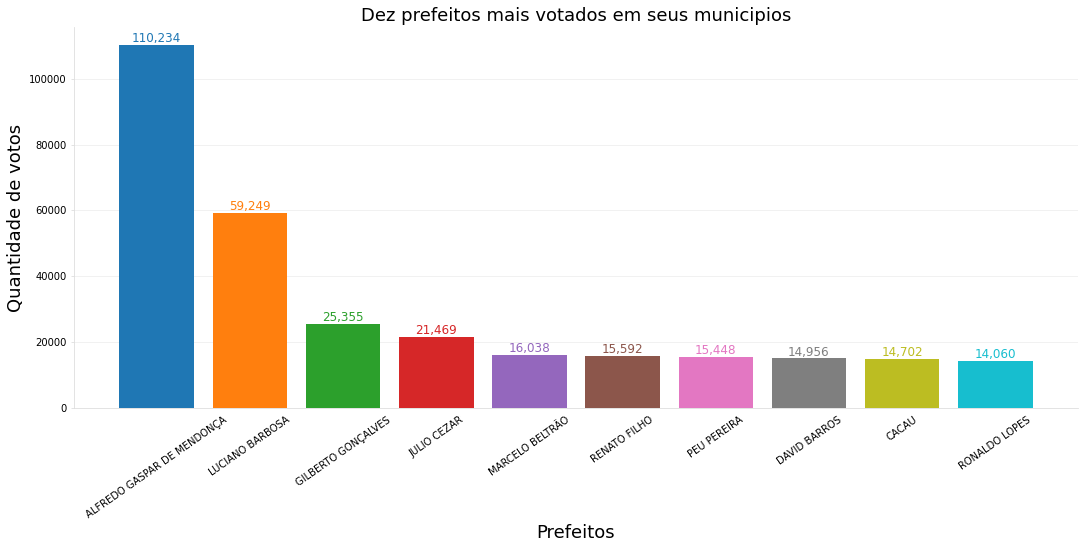

In [ ]:
# Plotando gráfico de barras
fig, ax = plt.subplots(figsize=(18, 7))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

ax.bar(a.NM_URNA_CANDIDATO.head(10), a.QT_VOTOS_NOMINAIS.head(10), color=colors)

ax.spines['top'].set_visible(False) # linha superior do grafico
ax.spines['right'].set_visible(False) # linha da direita
ax.spines['left'].set_color('#DDDDDD') # linha da esquerda
ax.spines['bottom'].set_color('#DDDDDD') # linha de baixo
ax.tick_params(bottom=False, color='#DDDDDD',left=True) # traço 
ax.set_axisbelow(True) # esconde as linhas horizontais durante as barras
ax.yaxis.grid(color='#EEEEEE') # esconde ou mostra as linhas 
ax.xaxis.grid(False) # esconde ou mostra as linhas verticais

ax.set_xlabel('Prefeitos', {'fontsize':18})
ax.set_ylabel('Quantidade de votos', {'fontsize':18})
ax.set_title('Dez prefeitos mais votados em seus municipios', {'fontsize':18})

# Add o texto nas barras
for bar in ax.patches:
  text = f'{bar.get_height():,}'
  text = text.replace(',', '.') # trocando pro padrão brasileiro
  ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() , f'{bar.get_height():,}', ha='center', va='bottom', color=bar.get_facecolor(),
          rotation=0, size=12) 
  
plt.xticks(rotation = 35) # rotação no 
plt.show()

In [ ]:
b = cand_al.loc[cand_al['DS_CARGO'] == 'Vereador'].drop_duplicates(subset=['NM_UE'],keep='first')

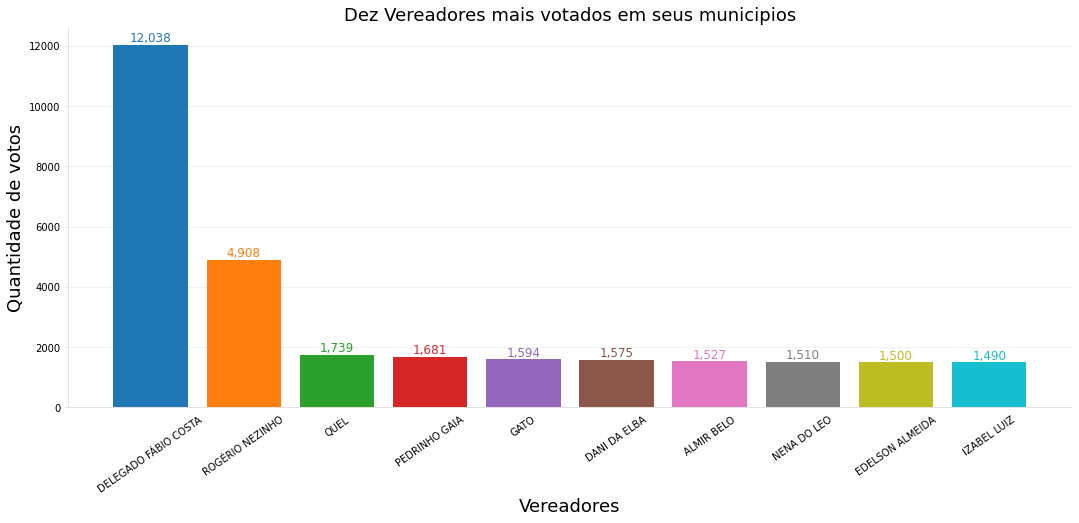

In [ ]:
# Plotando gráfico de barras
fig, ax = plt.subplots(figsize=(18, 7))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

ax.bar(b.NM_URNA_CANDIDATO.head(10), b.QT_VOTOS_NOMINAIS.head(10), color=colors)

ax.spines['top'].set_visible(False) # linha superior do grafico
ax.spines['right'].set_visible(False) # linha da direita
ax.spines['left'].set_color('#DDDDDD') # linha da esquerda
ax.spines['bottom'].set_color('#DDDDDD') # linha de baixo
ax.tick_params(bottom=False, color='#DDDDDD',left=True) # traço 
ax.set_axisbelow(True) # esconde as linhas horizontais durante as barras
ax.yaxis.grid(color='#EEEEEE') # esconde ou mostra as linhas 
ax.xaxis.grid(False) # esconde ou mostra as linhas verticais

ax.set_xlabel('Vereadores', {'fontsize':18})
ax.set_ylabel('Quantidade de votos', {'fontsize':18})
ax.set_title('Dez Vereadores mais votados em seus municipios', {'fontsize':18})

# Add o texto nas barras
for bar in ax.patches:
  text = f'{bar.get_height():,}'
  text = text.replace(',', '.') # trocando pro padrão brasileiro
  ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() , f'{bar.get_height():,}', ha='center', va='bottom', color=bar.get_facecolor(),
          rotation=0, size=12) 
  
plt.xticks(rotation = 35) # rotação no 
plt.show()

#### Agrupando os dados - Tabela 3

In [ ]:
# pegando a arrecadação total dos candidatos
receitas = dados_receitas.groupby(['SQ_CANDIDATO']).agg({'NM_UE': 'first', 'DS_CARGO': 'first', 'NM_CANDIDATO': 'first','SG_PARTIDO': 'first',
                                                                                         'NR_CANDIDATO': 'first', 'ST_TURNO': 'first',
                                                                                         'VR_RECEITA':'sum', 'DS_FONTE_RECEITA': 'count'}).sort_values(by=
                                                                                                                         'VR_RECEITA',
                                                                                                                         ascending=False).reset_index()
receitas

,SQ_CANDIDATO,NM_UE,DS_CARGO,NM_CANDIDATO,SG_PARTIDO,NR_CANDIDATO,ST_TURNO,VR_RECEITA,DS_FONTE_RECEITA
0,20000842791,MACEIÓ,Prefeito,JOÃO HENRIQUE HOLANDA CALDAS,PSB,40,2,5052797.91,27
1,20000699067,MACEIÓ,Prefeito,DAVID CABRAL DAVINO FILHO,PP,11,1,2641814.86,28
2,20000774385,MACEIÓ,Prefeito,ALFREDO GASPAR DE MENDONÇA NETO,MDB,15,2,2209890.00,58
3,20000909917,ARAPIRACA,Prefeito,FABIANA CAVALCANTE PESSOA,REPUBLICANOS,10,1,1476722.70,8
4,20000686605,ARAPIRACA,Prefeito,JOSÉ LUCIANO BARBOSA DA SILVA,MDB,15,1,909142.80,410
...,...,...,...,...,...,...,...,...,...
5226,20001244301,IGREJA NOVA,Vereador,WILLIAN DA SILVA FIRMINO,REPUBLICANOS,10999,1,14.00,1
5227,20001060947,PARIPUEIRA,Vereador,SIVALDO DE LIMA SANTOS,DEM,25333,1,14.00,1
5228,20001060944,PARIPUEIRA,Vereador,ANGELA MARIA DOS SANTOS LOPES,DEM,25100,1,14.00,1
5229,20000699361,SÃO MIGUEL DOS CAMPOS,Vereador,RAQUEL VIEIRA CARLOS,MDB,15666,1,10.10,1


#### Agrupando os dados - Tabela 4

In [ ]:
despesas_contratadas = dados_despesas_contratadas.groupby(['NM_UE', 'DS_CARGO', 'SQ_CANDIDATO']).agg({'NM_CANDIDATO': 'first','SG_PARTIDO': 'first',
                                                                                         'NR_CANDIDATO': 'first', 'ST_TURNO': 'first',
                                                                                         'VR_DESPESA_CONTRATADA':'sum'}).sort_values(by=
                                                                                                                         'VR_DESPESA_CONTRATADA',
                                                                                                                         ascending=False).reset_index()
despesas_contratadas

,NM_UE,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,SG_PARTIDO,NR_CANDIDATO,ST_TURNO,VR_DESPESA_CONTRATADA
0,MACEIÓ,Prefeito,20000842791,JOÃO HENRIQUE HOLANDA CALDAS,PSB,40,2,5134196.02
1,MACEIÓ,Prefeito,20000699067,DAVID CABRAL DAVINO FILHO,PP,11,1,3188196.15
2,MACEIÓ,Prefeito,20000774385,ALFREDO GASPAR DE MENDONÇA NETO,MDB,15,2,2143358.96
3,ARAPIRACA,Prefeito,20000909917,FABIANA CAVALCANTE PESSOA,REPUBLICANOS,10,1,1461511.55
4,ARAPIRACA,Prefeito,20000686605,JOSÉ LUCIANO BARBOSA DA SILVA,MDB,15,1,832287.98
...,...,...,...,...,...,...,...,...
4271,COQUEIRO SECO,Vereador,20000968176,CARLOS ALBERTO SOARES DA SILVA,MDB,15111,1,3.10
4272,COQUEIRO SECO,Vereador,20000968175,GILBERTO DOS SANTOS,MDB,15888,1,3.10
4273,COQUEIRO SECO,Vereador,20000835893,JOÃO IMBUZEIRO NETO,PSD,55123,1,3.10
4274,COQUEIRO SECO,Vereador,20000968171,ANIBAL ROSENDO DE LIMA,MDB,15555,1,3.10


### Merge entre as tabelas

In [ ]:
merge0 = filtro_no_vice.merge(cand_al[['QT_VOTOS_NOMINAIS','SQ_CANDIDATO',]], how = 'inner', on='SQ_CANDIDATO')
merge0

,NM_UE,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,DS_DETALHE_SITUACAO_CAND,SG_PARTIDO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,...,DS_ESTADO_CIVIL,DS_COR_RACA,CD_OCUPACAO,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,DS_SIT_TOT_TURNO,ST_REELEICAO,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA,QT_VOTOS_NOMINAIS
0,VIÇOSA,VEREADOR,20000673350,14555,ADEILTON ALEXANDRE FERREIRA,PAPAI FERREIRA,DEFERIDO,PTB,15/08/1970,50.0,...,SOLTEIRO(A),PARDA,221,MOTOBOY,19368.44,NÃO ELEITO,N,DEFERIDO,SIM,5
1,SÃO MIGUEL DOS CAMPOS,VEREADOR,20000922834,25630,PETRÔNIO VERÇOSA LEMOS,PETRÔNIO VERÇOSA,DEFERIDO,DEM,06/12/1970,50.0,...,CASADO(A),PARDA,257,EMPRESÁRIO,70399.54,ELEITO POR QP,N,DEFERIDO,SIM,817
2,ARAPIRACA,VEREADOR,20001257694,43456,MARIA JOSÉ LEITE DA SILVA,MARIA JOSÉ DA MANGABEIRA,DEFERIDO,PV,21/12/1971,49.0,...,SOLTEIRO(A),BRANCA,411,VENDEDOR DE COMÉRCIO VAREJISTA E ATACADISTA,94932.72,NÃO ELEITO,N,DEFERIDO,SIM,13
3,PIAÇABUÇU,PREFEITO,20000797456,12,KAYRO CRISTÓVÃO CASTRO DOS SANTOS,KAYRO CASTRO,DEFERIDO,PDT,02/06/1981,39.0,...,CASADO(A),PARDA,601,AGRICULTOR,123077.42,NÃO ELEITO,N,DEFERIDO,SIM,3506
4,SÃO SEBASTIÃO,VEREADOR,20000698660,11456,FHYSLAUREN FIRMINO ALBUQUERQUE,FHYSLAUREN ALBUQUERQUE,DEFERIDO,PP,10/08/1996,24.0,...,SOLTEIRO(A),PARDA,931,"ESTUDANTE, BOLSISTA, ESTAGIÁRIO E ASSEMELHADOS",34383.77,SUPLENTE,N,DEFERIDO,SIM,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6806,CAJUEIRO,VEREADOR,20000949146,33321,JANAINA DOS SANTOS FERREIRA,JANAINA,DEFERIDO,PMN,17/09/1974,46.0,...,CASADO(A),PARDA,999,OUTROS,12307.75,SUPLENTE,N,DEFERIDO,SIM,25
6807,BARRA DE SÃO MIGUEL,VEREADOR,20000672457,15111,MARINALDO SILVA MARTINIANO,NALDINHO,DEFERIDO,MDB,30/12/1975,45.0,...,SOLTEIRO(A),BRANCA,534,"MARINHEIRO CIVIL, CANOEIRO, EMBARCADO E ASSEME...",25155.92,SUPLENTE,N,DEFERIDO COM RECURSO,SIM,215
6808,TRAIPU,VEREADOR,20001031337,14044,DOUGLAS FELIPE ANDRADE MELO DOS SANTOS,DOUGLAS FELIPE,DEFERIDO,PTB,15/08/1993,27.0,...,SOLTEIRO(A),BRANCA,931,"ESTUDANTE, BOLSISTA, ESTAGIÁRIO E ASSEMELHADOS",12307.75,SUPLENTE,N,DEFERIDO,SIM,11
6809,PENEDO,VEREADOR,20000929473,90444,ALDILENE DOS SANTOS,ALDILENE SANTOS,DEFERIDO,PROS,02/05/1983,37.0,...,SOLTEIRO(A),PARDA,298,SERVIDOR PÚBLICO MUNICIPAL,30399.81,SUPLENTE,N,DEFERIDO,SIM,81


In [ ]:
merge0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6811 entries, 0 to 6810
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   NM_UE                       6811 non-null   object 
 1   DS_CARGO                    6811 non-null   object 
 2   SQ_CANDIDATO                6811 non-null   int64  
 3   NR_CANDIDATO                6811 non-null   int64  
 4   NM_CANDIDATO                6811 non-null   object 
 5   NM_URNA_CANDIDATO           6811 non-null   object 
 6   DS_DETALHE_SITUACAO_CAND    6811 non-null   object 
 7   SG_PARTIDO                  6811 non-null   object 
 8   DT_NASCIMENTO               6811 non-null   object 
 9   NR_IDADE_DATA_POSSE         6811 non-null   float64
 10  DS_GENERO                   6811 non-null   object 
 11  DS_GRAU_INSTRUCAO           6811 non-null   object 
 12  DS_ESTADO_CIVIL             6811 non-null   object 
 13  DS_COR_RACA                 6811 

In [ ]:
merge1 = merge0.merge(despesas_contratadas[['VR_DESPESA_CONTRATADA','SQ_CANDIDATO']], how = 'inner', on='SQ_CANDIDATO')
merge1

,NM_UE,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,DS_DETALHE_SITUACAO_CAND,SG_PARTIDO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,...,DS_COR_RACA,CD_OCUPACAO,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,DS_SIT_TOT_TURNO,ST_REELEICAO,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA,QT_VOTOS_NOMINAIS,VR_DESPESA_CONTRATADA
0,SÃO MIGUEL DOS CAMPOS,VEREADOR,20000922834,25630,PETRÔNIO VERÇOSA LEMOS,PETRÔNIO VERÇOSA,DEFERIDO,DEM,06/12/1970,50.0,...,PARDA,257,EMPRESÁRIO,70399.54,ELEITO POR QP,N,DEFERIDO,SIM,817,10890.95
1,PIAÇABUÇU,PREFEITO,20000797456,12,KAYRO CRISTÓVÃO CASTRO DOS SANTOS,KAYRO CASTRO,DEFERIDO,PDT,02/06/1981,39.0,...,PARDA,601,AGRICULTOR,123077.42,NÃO ELEITO,N,DEFERIDO,SIM,3506,111215.32
2,SÃO SEBASTIÃO,VEREADOR,20000698660,11456,FHYSLAUREN FIRMINO ALBUQUERQUE,FHYSLAUREN ALBUQUERQUE,DEFERIDO,PP,10/08/1996,24.0,...,PARDA,931,"ESTUDANTE, BOLSISTA, ESTAGIÁRIO E ASSEMELHADOS",34383.77,SUPLENTE,N,DEFERIDO,SIM,64,3952.00
3,SÃO SEBASTIÃO,VEREADOR,20000698699,77555,HENRIQUE GARCEZ DE OLIVEIRA,HENRIQUE GARCEZ,DEFERIDO,SOLIDARIEDADE,31/12/1966,54.0,...,PARDA,257,EMPRESÁRIO,34383.77,SUPLENTE,N,DEFERIDO,SIM,240,200.00
4,BRANQUINHA,VEREADOR,20000973119,43000,ROBSON LOPES DE SOUZA,ROBINHO DO BAR,DEFERIDO,PV,29/07/1969,51.0,...,PARDA,278,VEREADOR,12307.75,ELEITO POR QP,N,DEFERIDO,SIM,352,1175.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4179,MARAGOGI,VEREADOR,20001028410,11789,CLAUDIANE DA SILVA SANTOS,CLAUDIANE DA SAUDE,DEFERIDO,PP,14/01/1977,43.0,...,PARDA,999,OUTROS,28253.68,SUPLENTE,N,DEFERIDO,SIM,43,7990.11
4180,LAGOA DA CANOA,VEREADOR,20001051116,77888,EDJANE BALBINO DOS SANTOS,JANE BALBINO,DEFERIDO,SOLIDARIEDADE,18/09/1980,40.0,...,BRANCA,113,ENFERMEIRO,25709.97,ELEITO POR MÉDIA,N,DEFERIDO,SIM,225,2644.35
4181,DELMIRO GOUVEIA,VEREADOR,20000810612,12312,LUZINETE BARBOSA DA ROCHA,LUZINETE,DEFERIDO,PDT,21/07/1968,52.0,...,PARDA,601,AGRICULTOR,55650.51,NÃO ELEITO,N,DEFERIDO,SIM,11,575.00
4182,SÃO MIGUEL DOS CAMPOS,VEREADOR,20000699358,15999,ADAILTON ANTONIO DA SILVA,PEDRO DA SAÚDE,DEFERIDO,MDB,20/04/1974,46.0,...,BRANCA,243,TÉCNICO DE ENFERMAGEM E ASSEMELHADOS (EXCETO E...,70399.54,SUPLENTE,N,DEFERIDO,SIM,467,1945.85


## Plotando gráficos

#### Perfil Candidatos

##### Gênero dos candidatos

In [ ]:
# Verificando a quatidade de candidatos de cada gênero
genero = pd.DataFrame(dados_candidatos['DS_GENERO'].value_counts())
genero = genero.drop(index='NÃO DIVULGÁVEL')
genero

,DS_GENERO
MASCULINO,5039
FEMININO,2533


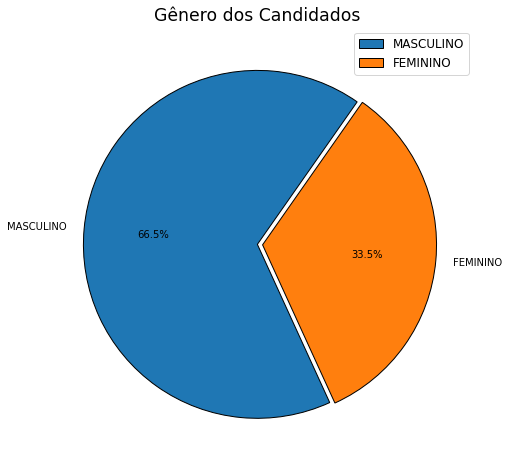

In [ ]:
# Plotando un gráfico de pizza
plt.rcParams['figure.figsize']=[8,8]
explode = (0, 0.03)
plt.pie(genero['DS_GENERO'], labels=genero.index, shadow=False, autopct='%1.1f%%', startangle=55, explode=explode, wedgeprops={'edgecolor': 'black'})

plt.title("Gênero dos Candidados",fontsize='xx-large')
plt.legend(fontsize=12,loc='best')
plt.show()

Curiosidade: A partir das eleições de 2020 cada partido precisou manter um número de candidatos de no minimo 30% e no maximo de 70 % para cada sexo.

##### Cor/Raça dos candidatos

In [ ]:
# Verificando o nº de candidatos autodeclarados de cada cor/raça
cor_raca = pd.DataFrame(dados_candidatos['DS_COR_RACA'].value_counts())
cor_raca = cor_raca.drop(index='NÃO DIVULGÁVEL')
cor_raca

,DS_COR_RACA
PARDA,4555
BRANCA,2290
PRETA,571
NÃO INFORMADO,82
INDÍGENA,42
AMARELA,32


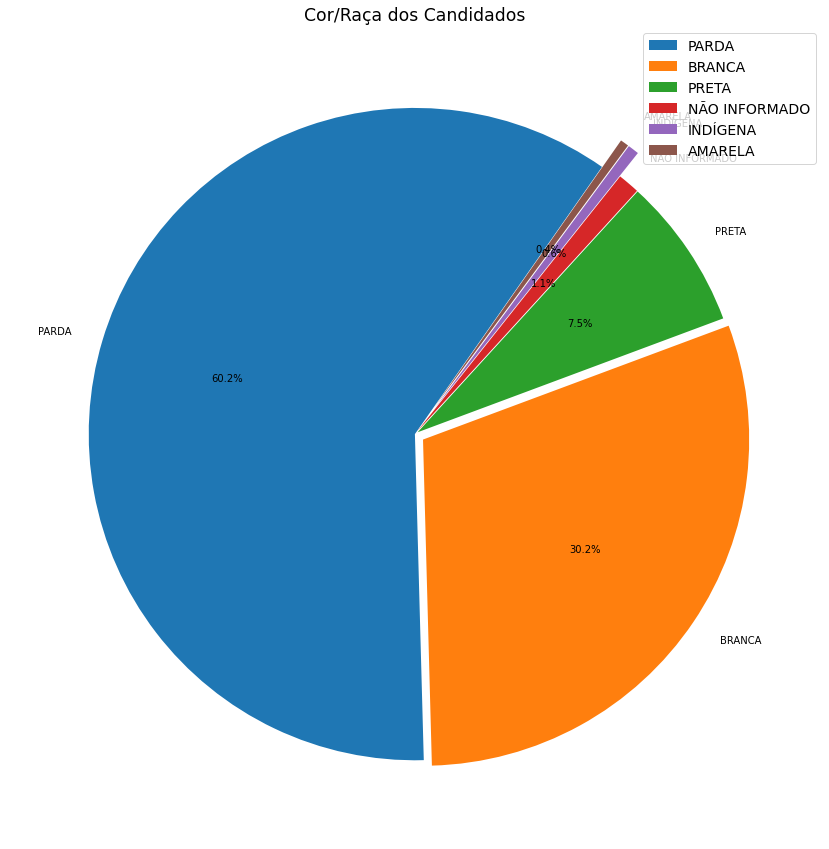

In [ ]:
# Plotando o grafico de pizza
plt.rcParams['figure.figsize']=[15,15]
explode = (0, 0.03, 0.01, 0.01, 0.1, 0.1)
plt.pie(cor_raca['DS_COR_RACA'], labels=cor_raca.index, shadow=False, autopct='%1.1f%%', startangle=55, explode=explode)

plt.title("Cor/Raça dos Candidados",fontsize='xx-large')
plt.legend(fontsize=14,loc='best')
plt.show()

##### Escolaridade - troca para barras

In [ ]:
# Verificando o grau de instrução dos candidatos
escolaridade = pd.DataFrame(dados_candidatos['DS_GRAU_INSTRUCAO'].value_counts())
escolaridade = escolaridade.drop(index='NÃO DIVULGÁVEL') # existe apenas 1 nos dados
escolaridade

,DS_GRAU_INSTRUCAO
ENSINO MÉDIO COMPLETO,2854
SUPERIOR COMPLETO,1802
ENSINO FUNDAMENTAL INCOMPLETO,993
ENSINO FUNDAMENTAL COMPLETO,850
ENSINO MÉDIO INCOMPLETO,402
SUPERIOR INCOMPLETO,388
LÊ E ESCREVE,282
ANALFABETO,1


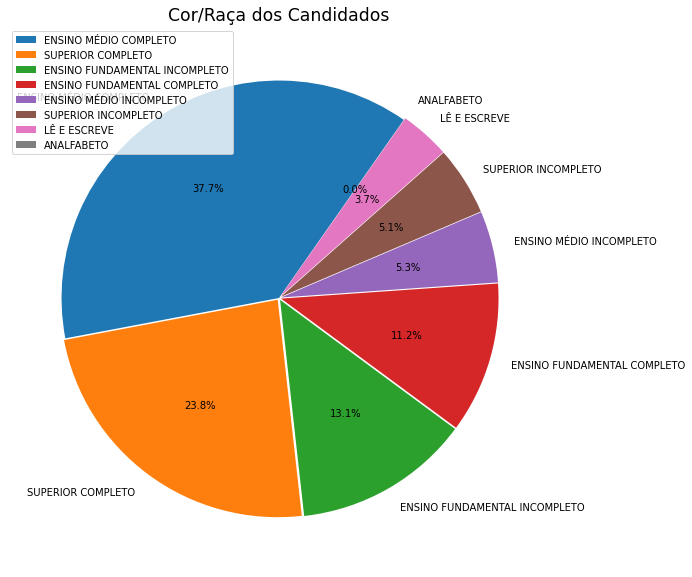

In [ ]:
plt.rcParams['figure.figsize']=[10,10]
explode = (0, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01)
plt.pie(escolaridade['DS_GRAU_INSTRUCAO'], labels=escolaridade.index, shadow=False, autopct='%1.1f%%', startangle=55, explode=explode)

plt.title("Cor/Raça dos Candidados",fontsize='xx-large')
plt.legend(fontsize=10,loc='best')
plt.show()

#### Qual partido tem o maior número de candidatos concorrendo?

In [ ]:
# Verificando a quantidade de candidatos que cada partido possui
n_cand_partido = dados_candidatos[['SG_PARTIDO']].value_counts()
vinte_cand_partido = n_cand_partido.head(20)
n_cand_partido

SG_PARTIDO   
MDB              1247
PP                976
PTB               639
PSD               463
REPUBLICANOS      407
PSDB              373
PROS              332
PDT               325
DEM               315
PT                283
PSB               253
PL                253
PSC               231
PMN               213
CIDADANIA         182
PRTB              152
PSL               135
SOLIDARIEDADE     130
AVANTE            123
PODE              119
PATRIOTA          107
PC do B            73
PV                 70
PTC                61
PSOL               47
REDE               42
DC                 15
UP                  5
PSTU                1
PCB                 1
dtype: int64

In [ ]:
# pegando os 10 partidos com maiores números
n_cand_partido = n_cand_partido.head(10).reset_index() # resetando os indices para volta a ser um dataframe
n_cand_partido

,SG_PARTIDO,0
0,MDB,1247
1,PP,976
2,PTB,639
3,PSD,463
4,REPUBLICANOS,407
5,PSDB,373
6,PROS,332
7,PDT,325
8,DEM,315
9,PT,283


In [ ]:
# pegando a coluna do count
n_cand_partido.iloc[:, 1] # n_cand_partido['0'] não funciona

0    1247
1     976
2     639
3     463
4     407
5     373
6     332
7     325
8     315
9     283
Name: 0, dtype: int64

Graficos de Barras adptados de : [link](https://)

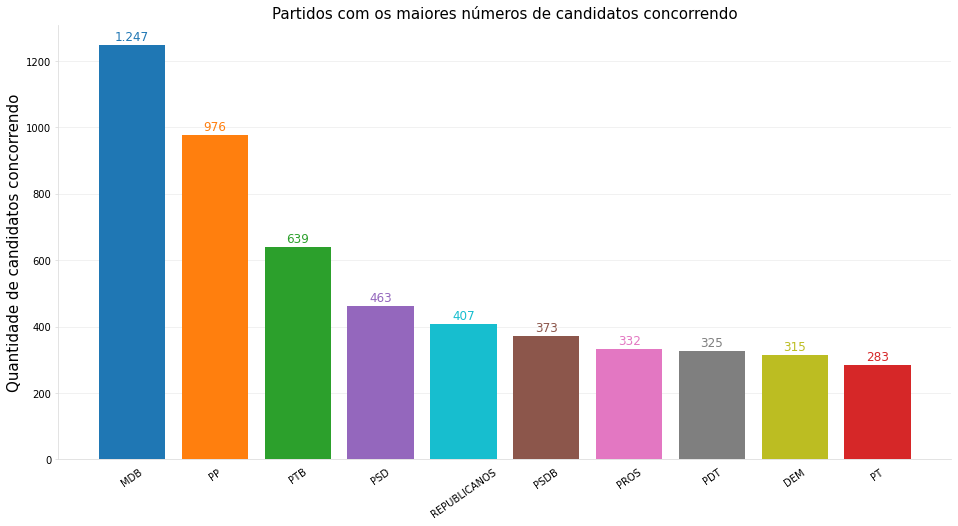

In [ ]:
# Plotando um gráfico de barras
fig, ax = plt.subplots(figsize=(16, 8))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd', '#17becf',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#d62728' ] # tentar pegar as cores reais dos partidos dps

ax.bar(n_cand_partido.SG_PARTIDO, n_cand_partido.iloc[:, 1], color=colors)

ax.spines['top'].set_visible(False) # linha superior do grafico
ax.spines['right'].set_visible(False) # linha da direita
ax.spines['left'].set_color('#DDDDDD') # linha da esquerda
ax.spines['bottom'].set_color('#DDDDDD') # linha de baixo
ax.tick_params(bottom=False, color='#DDDDDD',left=True) # traço 
ax.set_axisbelow(True) # esconde as linhas horizontais durante as barras
ax.yaxis.grid(color='#EEEEEE') # esconde ou mostra as linhas 
ax.xaxis.grid(False) # esconde ou mostra as linhas verticais

ax.set_ylabel('Quantidade de candidatos concorrendo', {'fontsize':15})
ax.set_title('Partidos com os maiores números de candidatos concorrendo', {'fontsize':15})

for bar in ax.patches:
  # A informação em cima da barra deve ser sua altura.
  bar_value = bar.get_height()
  # Determina onde o texto sob as barra fica
  text = f'{bar_value:,}' # formata adicionando o separador de milhar
  text = text.replace(',', '.') # trocando pro padrão brasileiro
  # pega o meio da barra no eixo x.
  text_x = bar.get_x() + bar.get_width() / 2 # Somando a coordenada x do inicio da barra com a metade de sua largura
  # Pegando a localização da barra no eixo y
  text_y = bar_value + 5
  # Pegando a cor da barra:
  bar_color = bar.get_facecolor()
 
 # Add o texto das barras
  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color, rotation=0, size=12)
  
plt.xticks(rotation = 35) # rotação no 
plt.show()

In [ ]:
#Quantidade de candidato concorrendo e eleito - dispersão

#### Qual partido elegeu mais cadidatos no 1º turno?

In [ ]:
# Filtrando o dataframe pelos candidatos eleitos
cand_eleitos = dados_candidatos[(dados_candidatos.DS_SIT_TOT_TURNO == 'ELEITO') | (dados_candidatos.DS_SIT_TOT_TURNO == 'ELEITO POR QP') 
                | (dados_candidatos.DS_SIT_TOT_TURNO == 'ELEITO POR MÉDIA')] # não é nescessario diferenciar qual o tipo de criterio de eleição
count_cand_eleitos = cand_eleitos[['SG_PARTIDO']].value_counts()
count_cand_eleitos

SG_PARTIDO   
MDB              366
PP               264
PTB              133
PSD               82
DEM               60
PL                50
PSC               49
REPUBLICANOS      47
PSDB              46
PSB               38
PROS              28
PDT               27
CIDADANIA         15
PT                14
PMN               14
PODE              13
SOLIDARIEDADE     13
PSL                8
PRTB               6
PV                 5
AVANTE             5
PC do B            2
PTC                1
dtype: int64

In [ ]:
count_cand_eleitos.sum() # quantidade de candidatos eleitos no 1 turno

1286

In [ ]:
count_cand_eleitos = count_cand_eleitos.head(10).reset_index() # pegando os 10 partidos que mais elegeram cadidatos
count_cand_eleitos

,SG_PARTIDO,0
0,MDB,366
1,PP,264
2,PTB,133
3,PSD,82
4,DEM,60
5,PL,50
6,PSC,49
7,REPUBLICANOS,47
8,PSDB,46
9,PSB,38


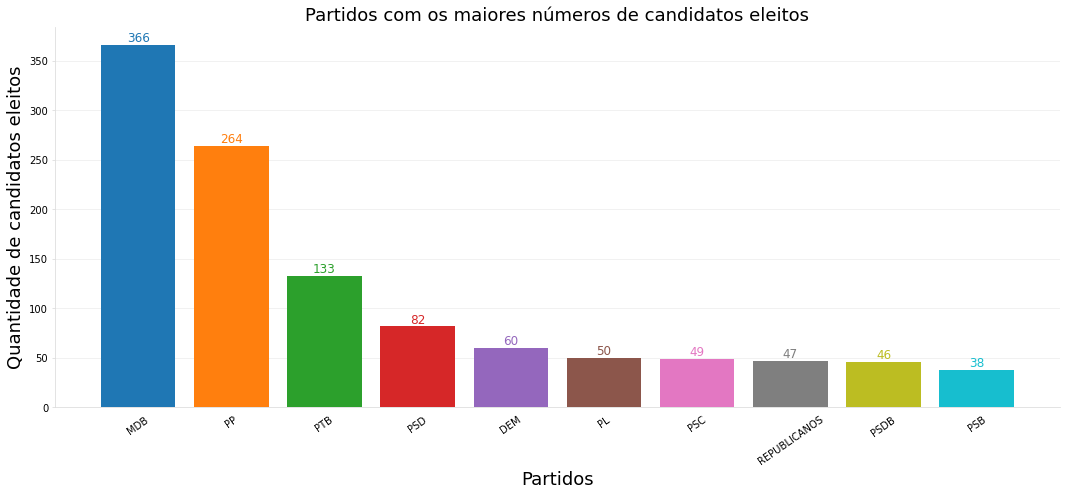

In [ ]:
# Plotando gráfico de barras
fig, ax = plt.subplots(figsize=(18, 7))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

ax.bar(count_cand_eleitos.SG_PARTIDO, count_cand_eleitos.iloc[:, 1], color=colors)

ax.spines['top'].set_visible(False) # linha superior do grafico
ax.spines['right'].set_visible(False) # linha da direita
ax.spines['left'].set_color('#DDDDDD') # linha da esquerda
ax.spines['bottom'].set_color('#DDDDDD') # linha de baixo
ax.tick_params(bottom=False, color='#DDDDDD',left=True) # traço 
ax.set_axisbelow(True) # esconde as linhas horizontais durante as barras
ax.yaxis.grid(color='#EEEEEE') # esconde ou mostra as linhas 
ax.xaxis.grid(False) # esconde ou mostra as linhas verticais

ax.set_xlabel('Partidos', {'fontsize':18})
ax.set_ylabel('Quantidade de candidatos eleitos', {'fontsize':18})
ax.set_title('Partidos com os maiores números de candidatos eleitos', {'fontsize':18})

# Add o texto nas barras
for bar in ax.patches:
  ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() , f'{bar.get_height()}', ha='center', va='bottom', color=bar.get_facecolor(),
          rotation=0, size=12) 
  
plt.xticks(rotation = 35) # rotação no 
plt.show()

#### Quais partidos conseguiram eleger mais candidatos proporcionalmente?

#### Visualizando o limite de gastos declarados pelos partidos em AL para os candidatos

###### Dez maiores valores máximos declarados como despesa de campanha pelos partidos para um candidato no estado de AL

In [ ]:
# Descobrindo os 10 maiores valores unicos
maiores_limites_cand = dados_candidatos.VR_DESPESA_MAX_CAMPANHA.unique()
maiores_limites_cand = np.sort(maiores_limites_cand)[::-1] # Ordenando de forma decrescente
print(maiores_limites_cand[0:10]) # mostrando os 10 maiores valores
print(maiores_limites_cand[9]) # o menor maior valor entre os 10

[5131759.9  2633359.67 2237191.48  931654.74  907681.86  562972.49
  555502.66  534652.28  532811.97  511605.02]
511605.02


In [ ]:
# como observamos que o menor entre os 10 maiores é 511605.02
cand_maiores_limites = dados_candidatos.loc[dados_candidatos['VR_DESPESA_MAX_CAMPANHA'] >= 511605.02]
cand_maiores_limites.nunique() # Verificando se as despesas estao iguais a 10 e comos os outro atributos ficaram

NM_UE                         10
DS_CARGO                       1
SQ_CANDIDATO                  48
NR_CANDIDATO                  21
NM_CANDIDATO                  48
NM_URNA_CANDIDATO             48
DS_DETALHE_SITUACAO_CAND       3
SG_PARTIDO                    21
DT_NASCIMENTO                 48
NR_IDADE_DATA_POSSE           29
DS_GENERO                      2
DS_GRAU_INSTRUCAO              6
DS_ESTADO_CIVIL                4
DS_COR_RACA                    3
CD_OCUPACAO                   19
DS_OCUPACAO                   19
VR_DESPESA_MAX_CAMPANHA       10
DS_SIT_TOT_TURNO               4
ST_REELEICAO                   2
DS_SITUACAO_CANDIDATO_URNA     5
ST_CANDIDATO_INSERIDO_URNA     2
dtype: int64

In [ ]:
# Cria um Dataframe agrupando por despesas e gênero e contando suas ocorrencias
maiores_limites = pd.DataFrame(cand_maiores_limites[['VR_DESPESA_MAX_CAMPANHA','DS_GENERO']]).value_counts().reset_index() 
maiores_limites

,VR_DESPESA_MAX_CAMPANHA,DS_GENERO,0
0,5131759.90,MASCULINO,8
1,2237191.48,MASCULINO,6
2,511605.02,MASCULINO,4
3,534652.28,MASCULINO,4
4,555502.66,MASCULINO,4
5,2633359.67,MASCULINO,4
6,562972.49,MASCULINO,3
7,931654.74,MASCULINO,3
8,532811.97,FEMININO,2
9,555502.66,FEMININO,2


In [ ]:
# É necessario que para todas despesas haja um valor correspondente ao sexo masculino e feminino
# então os sexos são dividos em tabela diferentes para que se possa adicionar os valores faltantes
limites_masc = maiores_limites[maiores_limites.DS_GENERO== 'MASCULINO']
limites_masc = limites_masc.sort_values(by='VR_DESPESA_MAX_CAMPANHA', ascending=False)
limites_masc

,VR_DESPESA_MAX_CAMPANHA,DS_GENERO,0
0,5131759.90,MASCULINO,8
5,2633359.67,MASCULINO,4
1,2237191.48,MASCULINO,6
7,931654.74,MASCULINO,3
10,907681.86,MASCULINO,2
6,562972.49,MASCULINO,3
4,555502.66,MASCULINO,4
3,534652.28,MASCULINO,4
14,532811.97,MASCULINO,1
2,511605.02,MASCULINO,4


In [ ]:
# tabela com os limites femininos
limites_femi = maiores_limites[maiores_limites.DS_GENERO== 'FEMININO']
limites_femi = limites_femi.sort_values(by='VR_DESPESA_MAX_CAMPANHA', ascending=False)
limites_femi

,VR_DESPESA_MAX_CAMPANHA,DS_GENERO,0
12,5131759.90,FEMININO,2
11,2237191.48,FEMININO,2
9,555502.66,FEMININO,2
8,532811.97,FEMININO,2
13,511605.02,FEMININO,1


In [ ]:
# Merge das tabelas
limites = limites_masc.merge(limites_femi, how = 'outer', on='VR_DESPESA_MAX_CAMPANHA')
limites

,VR_DESPESA_MAX_CAMPANHA,DS_GENERO_x,0_x,DS_GENERO_y,0_y
0,5131759.90,MASCULINO,8,FEMININO,2.0
1,2633359.67,MASCULINO,4,NaN,NaN
2,2237191.48,MASCULINO,6,FEMININO,2.0
3,931654.74,MASCULINO,3,NaN,NaN
4,907681.86,MASCULINO,2,NaN,NaN
5,562972.49,MASCULINO,3,NaN,NaN
6,555502.66,MASCULINO,4,FEMININO,2.0
7,534652.28,MASCULINO,4,NaN,NaN
8,532811.97,MASCULINO,1,FEMININO,2.0
9,511605.02,MASCULINO,4,FEMININO,1.0


In [ ]:
# 
limites['DS_GENERO_y'] =  'FEMININO' # Atribui a todas as linhas da coluna o valor feminino
limites.fillna(value=0, inplace=True) # Substitui valor nulos por 0
limites

,VR_DESPESA_MAX_CAMPANHA,DS_GENERO_x,0_x,DS_GENERO_y,0_y
0,5131759.90,MASCULINO,8,FEMININO,2.0
1,2633359.67,MASCULINO,4,FEMININO,0.0
2,2237191.48,MASCULINO,6,FEMININO,2.0
3,931654.74,MASCULINO,3,FEMININO,0.0
4,907681.86,MASCULINO,2,FEMININO,0.0
5,562972.49,MASCULINO,3,FEMININO,0.0
6,555502.66,MASCULINO,4,FEMININO,2.0
7,534652.28,MASCULINO,4,FEMININO,0.0
8,532811.97,MASCULINO,1,FEMININO,2.0
9,511605.02,MASCULINO,4,FEMININO,1.0


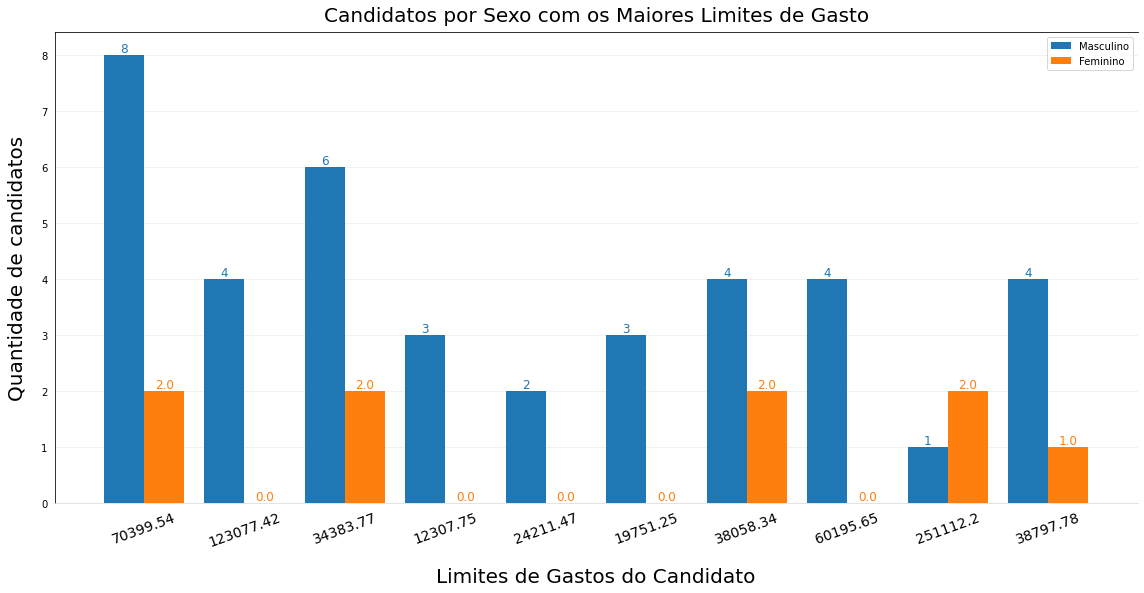

In [ ]:
# 
fig, ax = plt.subplots(figsize=(16, 8))
x = np.arange(len(limites.VR_DESPESA_MAX_CAMPANHA.unique()))
bar_width = 0.4

b1 = ax.bar(x, limites.loc[limites.DS_GENERO_x== 'MASCULINO', limites.columns[2]],
            width=bar_width, label='Masculino')
b2 = ax.bar(x + bar_width, limites.loc[limites.DS_GENERO_y== 'FEMININO', limites.columns[4]],
            width=bar_width, label='Feminino')

ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(merge1.VR_DESPESA_MAX_CAMPANHA.unique(),{'fontsize':14})

ax.legend()

ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True) # escondendo as linhas horizontais
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.set_xlabel('Limites de Gastos do Candidato', {'fontsize':20}, labelpad=18) # desloca para cima
ax.set_ylabel('Quantidade de candidatos', {'fontsize':20}, labelpad=15) # desloca pra direita
ax.set_title('Candidatos por Sexo com os Maiores Limites de Gasto', {'fontsize':20}, pad=11) # desloca para baixo

fig.tight_layout()

# Adiciona teXto em cada barra
for bar in ax.patches:
  # A informação em cima da barra deve ser sua altura.
  bar_value = bar.get_height()
  # Determina onde o texto sob as barra fica
  text = f'{bar_value:,}'
  # pega o meio da barra no eixo x.
  text_x = bar.get_x() + bar.get_width() / 2
  # Pegando altura no eixo y
  text_y = bar_value
  # Pegando a cor da barra:
  bar_color = bar.get_facecolor()
 
 # Add o texto das barras
  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color, rotation=0, size=12) 
  
plt.xticks(rotation = 20) # 
plt.show()

#### Limites de gastos impostos para os candidatos por genero/partido - Grouped bar chart with labels

In [ ]:
# Pegando os vinte partidos com maiores números de candidatos
vinte = vinte_cand_partido.reset_index()
#vinte = vinte.iloc[:, 1].reset_index(drop=True)
#vinte = vinte.set_index('SG_PARTIDO')
vinte

,SG_PARTIDO,0
0,MDB,1247
1,PP,976
2,PTB,639
3,PSD,463
4,REPUBLICANOS,407
5,PSDB,373
6,PROS,332
7,PDT,325
8,DEM,315
9,PT,283


In [ ]:
# transformando em lista pra o método isin pegar os candidatos que estão nesses partidos
vintep = vinte.SG_PARTIDO.to_list()
vintep

['MDB',
 'PP',
 'PTB',
 'PSD',
 'REPUBLICANOS',
 'PSDB',
 'PROS',
 'PDT',
 'DEM',
 'PT',
 'PSB',
 'PL',
 'PSC',
 'PMN',
 'CIDADANIA',
 'PRTB',
 'PSL',
 'SOLIDARIEDADE',
 'AVANTE',
 'PODE']

In [ ]:
# Pegando os candidatos que estão na lista dos 20 partidos mais populosos para que se possa distinguir entre masculino e feminino
vinte_cand = dados_candidatos[dados_candidatos.SG_PARTIDO.isin(vintep)] # Caso o partido da tabela seja um dos que estão na lista
vinte_cand

In [ ]:
# Cria um Dataframe agrupando por despesas e gênero e contando suas ocorrencias
maiores_gastos20 = pd.DataFrame(vinte_cand[['DS_GENERO','SG_PARTIDO']]).value_counts() #.reset_index()
maiores_gastos20 = maiores_gastos20.drop(index='NÃO DIVULGÁVEL').reset_index()
maiores_gastos20

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,DS_GENERO,SG_PARTIDO,0
0,MASCULINO,MDB,835
1,MASCULINO,PP,645
2,MASCULINO,PTB,431
3,FEMININO,MDB,412
4,FEMININO,PP,330
5,MASCULINO,PSD,309
6,MASCULINO,REPUBLICANOS,269
7,MASCULINO,PSDB,252
8,MASCULINO,PROS,223
9,MASCULINO,PDT,213


In [ ]:
maiores_gastos20.DS_GENERO.value_counts() # verificando se há o mesmo número de Homens e mulheres para plotar o group bar

MASCULINO    20
FEMININO     20
Name: DS_GENERO, dtype: int64

In [ ]:
# Calculando as porcentagens de cada sexo no partido
porcentagem = []
 
for i in range(maiores_gastos20.shape[0]): # Iterar sob o a tabela
  for j in vinte.SG_PARTIDO: # iterar sob a lista com os partidos e sua quatidade total de membros
    #print(j, i, maiores_gastos20['SG_PARTIDO'][i])
    if j == maiores_gastos20['SG_PARTIDO'][i]: # Quando encontrado a correspondencia entre os partidos em ambas tabela
      #print('2',maiores_gastos20.iloc[:, 2][i], vinte.iloc[:, 1][a])
      a = vinte.index[vinte['SG_PARTIDO']== j].tolist() # Pega o indice que vai estar em Int64Index e converte para lista para que se possa pegar o limite do partido
      a = a[0] # Pega o 1 item da lista que é o indice do partido que precisamos
      pct = (maiores_gastos20.iloc[:, 2][i] / vinte.iloc[:, 1][a]) * 100  # calcula-se a porcentagem pegando o limite (limiteporSexo/limitePartido) * 100
      porcentagem.append(round(pct, 2)) 
 
print(porcentagem)

[66.96, 66.09, 67.45, 33.04, 33.81, 66.74, 66.09, 67.56, 67.17, 65.54, 66.35, 32.55, 65.37, 68.38, 66.4, 33.26, 66.23, 67.61, 33.91, 32.44, 64.84, 34.46, 32.83, 33.65, 67.11, 34.63, 65.93, 66.92, 33.6, 67.48, 31.62, 33.77, 64.71, 32.39, 35.16, 32.89, 34.07, 33.08, 35.29, 32.52]


In [ ]:
maiores_gastos20['Porcentagem'] = porcentagem # add as porcentagens a tabela
maiores_gastos20

,DS_GENERO,SG_PARTIDO,0,Porcentagem
0,MASCULINO,MDB,835,66.96
1,MASCULINO,PP,645,66.09
2,MASCULINO,PTB,431,67.45
3,FEMININO,MDB,412,33.04
4,FEMININO,PP,330,33.81
5,MASCULINO,PSD,309,66.74
6,MASCULINO,REPUBLICANOS,269,66.09
7,MASCULINO,PSDB,252,67.56
8,MASCULINO,PROS,223,67.17
9,MASCULINO,PDT,213,65.54


In [ ]:
# É nescessario ordenar pois espara-se um cadidato masc e femi para cada partido na mesma sequencia
maiores_gastos20 = maiores_gastos20.sort_values(by='SG_PARTIDO')
maiores_gastos20

,DS_GENERO,SG_PARTIDO,0,Porcentagem
39,FEMININO,AVANTE,40,32.52
29,MASCULINO,AVANTE,83,67.48
34,FEMININO,CIDADANIA,64,35.16
20,MASCULINO,CIDADANIA,118,64.84
23,FEMININO,DEM,106,33.65
10,MASCULINO,DEM,209,66.35
0,MASCULINO,MDB,835,66.96
3,FEMININO,MDB,412,33.04
21,FEMININO,PDT,112,34.46
9,MASCULINO,PDT,213,65.54


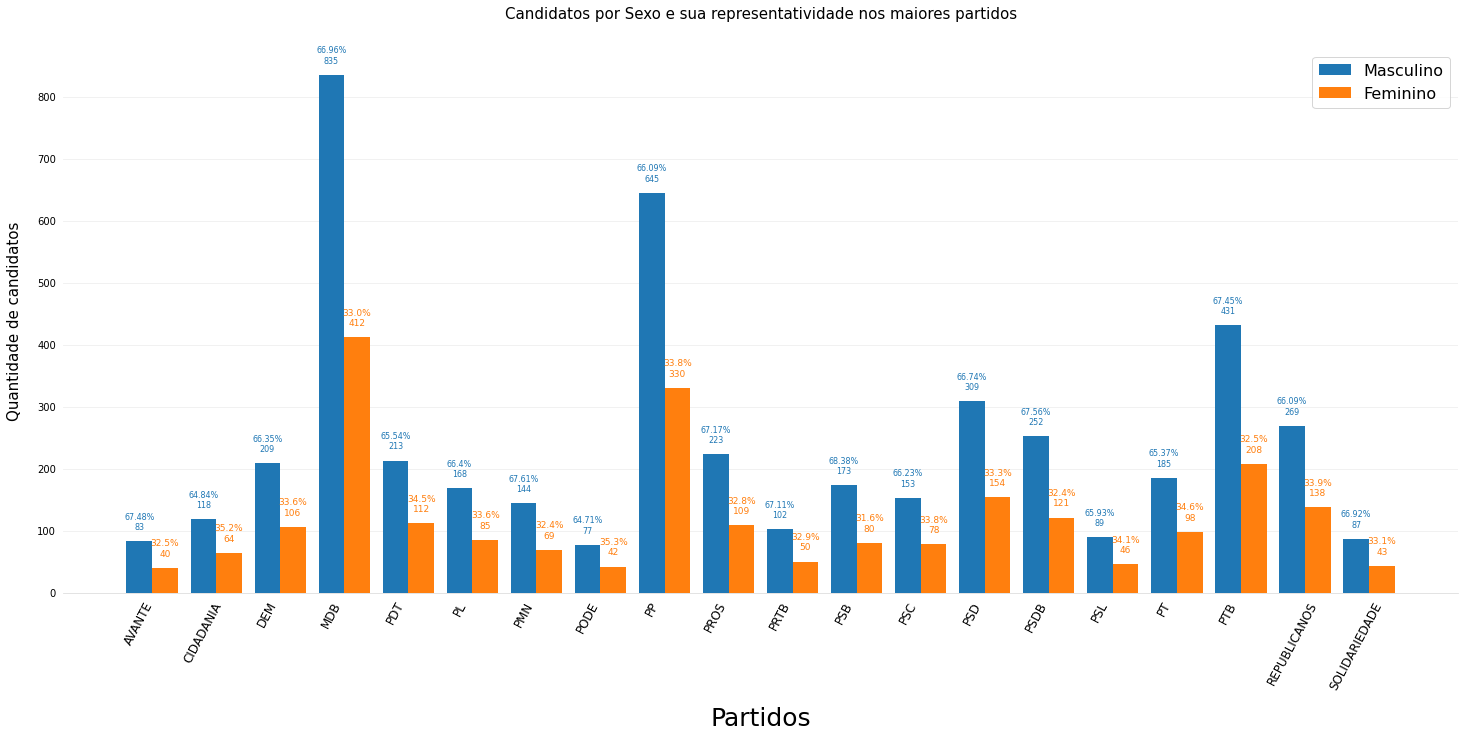

In [ ]:
#
fig, ax = plt.subplots(figsize=(25, 10))
x = np.arange(len(maiores_gastos20.SG_PARTIDO.unique()))
bar_width = 0.4
b1 = ax.bar(x, maiores_gastos20.loc[maiores_gastos20.DS_GENERO== 'MASCULINO', maiores_gastos20.columns[2]],
            width=bar_width, label='Masculino')
b2 = ax.bar(x + bar_width, maiores_gastos20.loc[maiores_gastos20.DS_GENERO== 'FEMININO', maiores_gastos20.columns[2]],
            width=bar_width, label='Feminino')

ax.set_xticks(x)
ax.set_xticklabels(maiores_gastos20.SG_PARTIDO.unique(),{'fontsize':12})

ax.legend(fontsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True) # escondendo as linhas horizontais
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.set_xlabel('Partidos', {'fontsize':25}, labelpad=15) # desloca para cima
ax.set_ylabel('Quantidade de candidatos', {'fontsize':15}, labelpad=15) # desloca pra direita
ax.set_title('Candidatos por Sexo e sua representatividade nos maiores partidos', {'fontsize':15}, pad=30) # desloca para baixo

# Colando a porcentagem no topo da barra
for rect,p in zip(b1, maiores_gastos20.loc[maiores_gastos20['DS_GENERO'] == 'MASCULINO']['Porcentagem']): # pega a barra e sua porcentagem de acordo com o sexo
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height+15, f'{p}%\n{height}', ha='center', va='bottom', fontsize=8, rotation=0, color=rect.get_facecolor())

for rect,p in zip(b2, maiores_gastos20.loc[maiores_gastos20['DS_GENERO'] == 'FEMININO']['Porcentagem']):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height+15, f'{p:.1f}%\n{height}', ha='center', va='bottom', fontsize=9, rotation=0, color=rect.get_facecolor())

plt.xticks(rotation = 62)
plt.show()

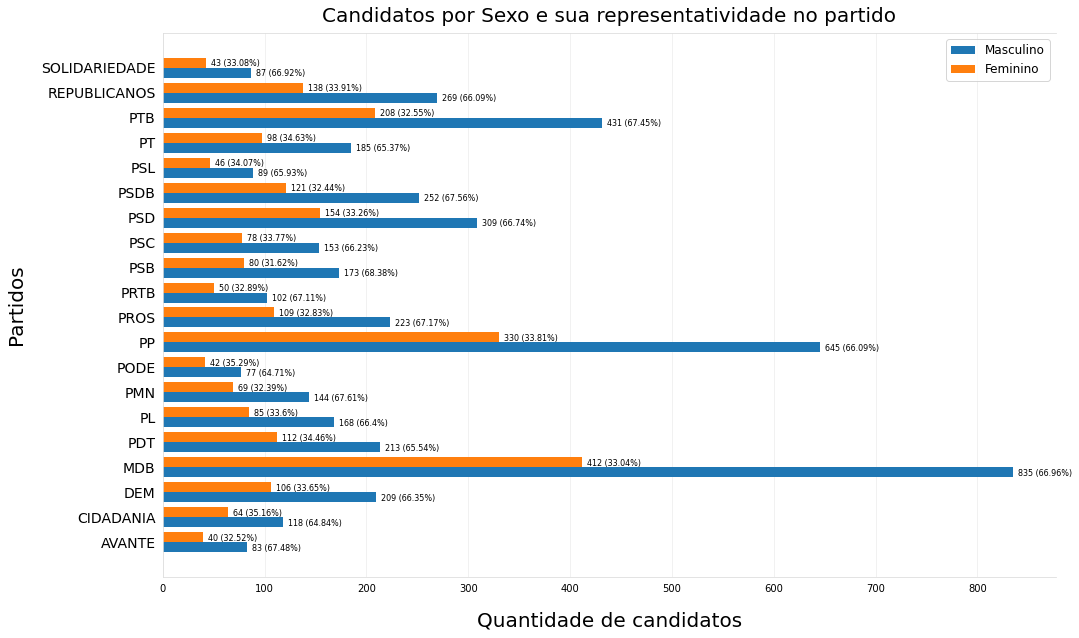

In [ ]:

fig, ax = plt.subplots(figsize=(16, 10))
x = np.arange(len(maiores_gastos20.SG_PARTIDO.unique()))
bar_height = 0.4
b1 = ax.barh(x, maiores_gastos20.loc[maiores_gastos20.DS_GENERO== 'MASCULINO', maiores_gastos20.columns[2]],
            height=bar_height, label='Masculino')
b2 = ax.barh(x + bar_width, maiores_gastos20.loc[maiores_gastos20.DS_GENERO== 'FEMININO', maiores_gastos20.columns[2]],
            height=bar_height, label='Feminino')

ax.set_yticks(x + bar_height/2)
ax.set_yticklabels(maiores_gastos20.SG_PARTIDO.unique(),{'fontsize':14})
ax.legend(fontsize=12)

ax.spines['top'].set_color('#DDDDDD')
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#DDDDDD')
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True) # escondendo as linhas horizontais
ax.yaxis.grid(False)
ax.xaxis.grid(True, color='#EEEEEE')

ax.set_xlabel('Quantidade de candidatos', {'fontsize':20}, labelpad=18) # desloca para cima
ax.set_ylabel('Partidos', {'fontsize':20}, labelpad=15) # desloca pra direita
ax.set_title('Candidatos por Sexo e sua representatividade no partido', {'fontsize':20}, pad=11) # desloca para baixo

#fig.tight_layout() 

# Colando a porcentagem no topo da barra
for rect,p in zip(b1, maiores_gastos20.loc[maiores_gastos20['DS_GENERO'] == 'MASCULINO']['Porcentagem']): # pega a barra e sua porcentagem de acordo com o sexo
    width = rect.get_width()
    ax.annotate(f'{width} ({p}%)', xy=(width, rect.get_y() + rect.get_height() / 2), xytext=(5, 0), textcoords="offset points",ha='left',
                va='center_baseline', fontsize=8)

for rect,p in zip(b2, maiores_gastos20.loc[maiores_gastos20['DS_GENERO'] == 'FEMININO']['Porcentagem']):
    width = rect.get_width()
    ax.annotate(f'{width} ({p}%)', xy=(width, rect.get_y() + rect.get_height() / 2), xytext=(5, 0), textcoords="offset points",ha='left',
                va='center_baseline', fontsize=8)

#### Visualizando a arrecadação declarada pelos candidatos

##### Investimento do partido em candidatos por genero/partido - Grouped bar chart with labels?

#### Três candidatos mais votados para o cargo de prefeito nas 5 cidades mais populosas

#### Três candidatos mais votados para o cargo de vereador nas 5 cidades mais populosas

#### Grafico de Dispersão voto x Limite de gastos na campanha

In [ ]:
# Pegando dados da junção entre a tabela 1 e 2
amostra1 = merge0.VR_DESPESA_MAX_CAMPANHA
amostra2 = merge0.QT_VOTOS_NOMINAIS

In [ ]:
np.corrcoef(amostra1,amostra2)[0,1]

0.6060168410760818

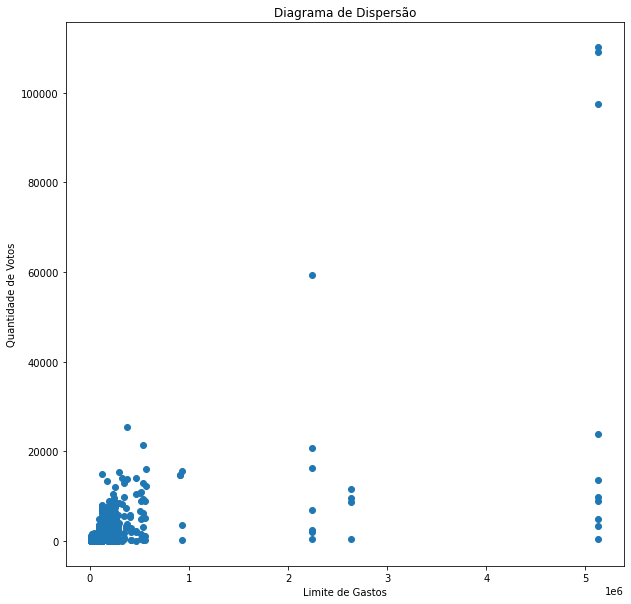

In [ ]:
plt.scatter(amostra1, amostra2)
plt.xlabel('Limite de Gastos')
plt.ylabel('Quantidade de Votos')
plt.title('Diagrama de Dispersão')
plt.show()

#### Grafico de Dispersão voto x Gastos na campanha

In [ ]:
# Pega o resultado entre o merge das tabela com os votos porcadi
amostra1 = merge1.VR_DESPESA_CONTRATADA
amostra2 = merge1.QT_VOTOS_NOMINAIS

In [ ]:
np.corrcoef(amostra1,amostra2)[0,1] #  indica correlação positiva forte

0.8966803429401575

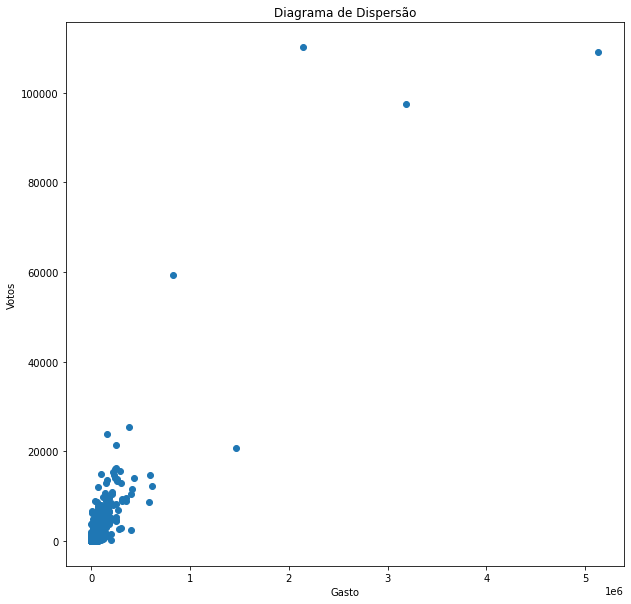

In [ ]:
plt.scatter(amostra1, amostra2)
plt.xlabel('Gasto')
plt.ylabel('Votos')
plt.title('Diagrama de Dispersão')
plt.show()

In [ ]:
import plotly.express as px

px.scatter(x=amostra1, y=amostra2, hover_name=merge1.NM_URNA_CANDIDATO, color=merge1.SG_PARTIDO)

#### Grafico de barras - gastos por partido

# Identificando o perfil do Eleitor

## Tabela 4 - Dados do Eleitor

**Pricipais atributos do dataset**: 

*   NR_TURNO - Búmero do turno
*   SG_UF	- Unidade da Federação
*   NM_MUNICIPIO - Nome do município
*   NR_ZONA - Número da Zona Eleitoral
*   CD_GENERO - Código do gênero do eleitor
*   DS_GENERO - Gênero do eleitor
*   CD_ESTADO_CIVIL - Código do estado civil do eleitor 
*   DS_ESTADO_CIVIL - Estado civil do eleitor de acordo com a última atualização realizada pelo mesmo na Justiça Eleitora
*   CD_FAIXA_ETARIA - Código da faixa etária
* DS_FAIXA_ETARIA - Faixa etária
* CD_GRAU_ESCOLARIDADE - Código do grau de escolaridade do eleitor de acordo com a última atualização realizada pelo mesmo na Justiça Eleitoral.
* DS_GRAU_ESCOLARIDADE - Grau de escolaridade do eleitor
* QT_APTOS - Quantidade de eleitores aptos a votar naquele município e 
zona no ano eleitoral
* QT_COMPARECIMENTO - Quantidade de eleitores aptos que compareceram às 
eleições naquele município e zona no ano eleitoral.
* QT_ABSTENCAO - Quantidade de eleitores aptos que não compareceram às 
eleições naquele município e zona no ano eleitoral
* QT_COMPARECIMENTO_DEFICIENCIA - Quantitativo de eleitores aptos com deficiência oumobilidade reduzida que compareceram às eleições 
naquele município e zona no ano eleitoral
* QT_ABSTENCAO_DEFICIENCIA - Quantitativo de eleitores aptos com deficiência ou 
mobilidade reduzida que não compareceram às eleições naquele município e zona no ano eleitoral.
* QT_COMPARECIMENTO_TTE - Quantitativo de eleitores aptos que solicitaram 
transferência temporária de eleitor (TTE) e que compareceram às eleições naquele município e zona no ano eleitoral.
* QT_ABSTENCAO_TTE - Quantitativo de eleitores aptos que solicitaram transferência temporária de eleitor (TTE) e que não compareceram às eleições naquele município e zona no ano eleitoral


**Quantidade de linhas** = 4770970

**Quantidade de Municipios** =  

**Problemas encontrados**:  

In [ ]:
#Tabela com dados sobre os cadidados
dados_eleitor = pd.read_csv('/content/drive/My Drive/Visualização Computacional/perfil_comparecimento_abstencao_2020.csv', sep=";", encoding='latin-1')
dados_eleitor

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,NR_TURNO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,CD_GENERO,DS_GENERO,...,DS_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,QT_APTOS,QT_COMPARECIMENTO,QT_ABSTENCAO,QT_COMPARECIMENTO_DEFICIENCIA,QT_ABSTENCAO_DEFICIENCIA,QT_COMPARECIMENTO_TTE,QT_ABSTENCAO_TTE
0,21/12/2020,14:48:46,2020,2,SP,71072,SÃO PAULO,328,2,MASCULINO,...,75 a 79 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,269,65,204,3,6,3,16
1,21/12/2020,14:48:46,2020,2,SP,71072,SÃO PAULO,328,2,MASCULINO,...,85 a 89 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,78,3,75,0,0,1,5
2,21/12/2020,14:48:46,2020,2,SP,71072,SÃO PAULO,328,2,MASCULINO,...,95 a 99 anos,6,ENSINO MÉDIO COMPLETO,2,0,2,0,0,0,0
3,21/12/2020,14:48:46,2020,2,SP,71072,SÃO PAULO,328,2,MASCULINO,...,30 a 34 anos,1,ANALFABETO,1,1,0,0,0,0,0
4,21/12/2020,14:48:46,2020,2,SP,71072,SÃO PAULO,328,2,MASCULINO,...,40 a 44 anos,5,ENSINO MÉDIO INCOMPLETO,2,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4770965,21/12/2020,14:48:46,2020,1,CE,14273,ITAPAJÉ,41,4,FEMININO,...,30 a 34 anos,5,ENSINO MÉDIO INCOMPLETO,2,2,0,0,0,0,0
4770966,21/12/2020,14:48:46,2020,1,CE,14273,ITAPAJÉ,41,4,FEMININO,...,50 a 54 anos,1,ANALFABETO,1,1,0,0,0,0,0
4770967,21/12/2020,14:48:46,2020,1,CE,14273,ITAPAJÉ,41,4,FEMININO,...,60 a 64 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,5,4,1,0,0,1,0
4770968,21/12/2020,14:48:46,2020,1,CE,14273,ITAPAJÉ,41,4,FEMININO,...,70 a 74 anos,2,LÊ E ESCREVE,5,2,3,0,0,0,2
